In [38]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime
import math
import warnings
warnings.filterwarnings('ignore')

from pylab import rcParams
from tqdm import tqdm_notebook
import fbprophet

In [39]:
# df_merged_no_hol_old = pd.read_csv('usage_and_failed_search_no_hol.csv')
df_merged_no_hol = pd.read_csv('no_hol_v2_edited.csv')
df_2018s2 = pd.read_csv('2018_2_no_exam.csv')
df_2019s1 = pd.read_csv('2019_1.csv')
df_closed = pd.read_csv('closed_semester.csv')

frames = [df_2018s2, df_2019s1]
joined = pd.concat(frames)
# df = joined[joined['Station_depart.'] == '12 CU Terrace']
df = joined

Top 5 routes

|Depart - Destination Station|2018/2|scale & rounding|upper|2019/1|scale & rounding|upper|Remark
|-------------------|------|----------------|-----|------|----------------|-----|------
|12 CU Terrace - 04 Engineering|69.9%|0.5 and 3|N|56.1%|0.1 and 9|N|logistics 0-5|
|04 Engineering - 12 CU Terrace|78.0%|0.8 and 3|N|57.0%|0.5 and 4|N|0.2 and 6 = 81%, 2019/1 logistic 0-3|
|12 CU Terrace - 03 Sala Prakeaw|81.6%|0.3 and 7|Y|80.0%|0.1 and 9|Y| logistics 0-3|
|02 Economics - 22 Siam Square Soi 8|80.5%|0.5 and 6|Y|72.6%|0.9 and 6|N|2019/1 logistics 0-4|
|04 Engineering - 21 Wittayakit Building|76.7%|0.6 and 4.5|Y|-|-|-||
|02 Economics - 21 Wittayakit Building|-|-|-|71.1%|0.9 and 8|N|logistics 0-4|
|02 Economics - 12 CU Terrace|-|-|-|68.1%|0.8 and 9|Y|logistics 0-4|

Depart Station: 12 CU Terrace

|Destination Station|2018/2|scale & rounding|upper|2019/1|scale & rounding|upper|Remark
|-------------------|------|----------------|-----|------|----------------|-----|------
|01 Exit to Cham square|79.2%|0.4 and 1|N|84.4%|0.8 and 7|Y|weird trend afterwards(both)|
|02 Economics|85.3%|0.5 and 5|N|84.4%|0.2 and 6|N||
|03 Sala Prakeaw|82.8%|0.1 and 3|N|77.8%|0.1 and 5|N||
|04 Engineering|74.7%|0.6 and 0.37|N|56.1%|0.1 and 9|N||
|05 Arts|94.5%|0.1 and 4|Y|78.7%|0.8 and 6|Y||
|06 Chamchuri 9|97.0%|0.4 and 4|Y|60.0%|0.1 and 9|Y||
|07 Chamchuri 5|100%|-|-|100%|-|-|underfit|
|08 Witthaya Nives|100%|-|-|100%|-|-|underfit|
|09 Chamchuri 10|90.3%|02 and 3|N|88.9%|0.2 and 8|N||
|10 Chulaphat 14|100%|-|-|100%|-|-|underfit|
|11 BTS-National stadium|88.3%|0.1 and 5|N|80%|0.1 and 3|N||
|12 CU Terrace|93.9%|0.2 and 1|N|88.9%|0.9 and 3|N|no logistics|
|13 Suan Luang sqaure|100%|-|-|100%|-|-|no data|
|14 I'm Park|100%|-|-|100%|-|-|underfit|
|15 U Center|100%|-|-|100%|-|-|underfit and weird trend, no logistics|
|16 Communication Arts|81.2%|0.3 and 2|N|80.0%|0.1 and 4|N|underfit|
|17 Property office|100%|-|-|100%|-|-|underfit|
|18 Art and Culture|81.2%|0.8 and 2|N|86.7%|0.9 and 4|N|no logistics|
|19 Pharmaceutical Science|100%|-|-|19.5%|-|-|2018/2 underfit, 2019/1 weird trend|
|20 Veterinary Science|94.5%|0.2 and 2|N|71.1%|0.5 and 2|N|no logistics|
|21 Wittayakit Building|85.5%|0.1 and 3|Y|91.1%|0.6 and 6|Y|no logistics|
|22 Siam Square Soi 8|77.0%|0.1 and 4|Y|88.9%|0.9 and 8|Y||
|average|86.4%|-|-|79.1%|-|-||

In [40]:
df_o = df[df['Station_depart.'] == '02 Economics']
df_od = df_o[df_o['Station_dest.'] == '12 CU Terrace']

df_od

,Date,regist_dt_ICT,start_dt_ICT,end_dt_ICT,Customer_ID,Station_depart.,Station_dest.
9,7/1/2019,16:26:57,NaN,NaN,CP#0QKM0,02 Economics,12 CU Terrace
97,8/1/2019,16:56:49,16:59:28,17:14:04,CP#0PRG6,02 Economics,12 CU Terrace
303,10/1/2019,15:18:49,15:20:53,15:31:51,CP#0TG32,02 Economics,12 CU Terrace
304,10/1/2019,15:19:03,15:20:02,15:31:00,CP#0TQ52,02 Economics,12 CU Terrace
305,10/1/2019,15:47:33,NaN,NaN,CP#0TQ52,02 Economics,12 CU Terrace
...,...,...,...,...,...,...,...
5467,26/9/2019,14:57:14,14:59:41,15:11:08,CP#0TPR0,02 Economics,12 CU Terrace
5468,26/9/2019,15:01:59,15:12:04,15:18:57,CP#0V9B9,02 Economics,12 CU Terrace
5469,26/9/2019,18:17:52,18:18:28,18:27:10,CP#0RYR9,02 Economics,12 CU Terrace
5741,30/9/2019,16:29:30,16:30:30,16:37:22,CP#0SLD2,02 Economics,12 CU Terrace


In [41]:
df_od['DateTime'] = df_od[df_od.columns[0:2]].apply(lambda x : '/' .join(x.astype(str)),axis=1)
df_od['DateTime'] = df_od['DateTime'].str.replace(":", "/")

demand = []
demand = [1] * len(df_od)
df_od['Demand'] = demand
df_od

,Date,regist_dt_ICT,start_dt_ICT,end_dt_ICT,Customer_ID,Station_depart.,Station_dest.,DateTime,Demand
9,7/1/2019,16:26:57,NaN,NaN,CP#0QKM0,02 Economics,12 CU Terrace,7/1/2019/16/26/57,1
97,8/1/2019,16:56:49,16:59:28,17:14:04,CP#0PRG6,02 Economics,12 CU Terrace,8/1/2019/16/56/49,1
303,10/1/2019,15:18:49,15:20:53,15:31:51,CP#0TG32,02 Economics,12 CU Terrace,10/1/2019/15/18/49,1
304,10/1/2019,15:19:03,15:20:02,15:31:00,CP#0TQ52,02 Economics,12 CU Terrace,10/1/2019/15/19/03,1
305,10/1/2019,15:47:33,NaN,NaN,CP#0TQ52,02 Economics,12 CU Terrace,10/1/2019/15/47/33,1
...,...,...,...,...,...,...,...,...,...
5467,26/9/2019,14:57:14,14:59:41,15:11:08,CP#0TPR0,02 Economics,12 CU Terrace,26/9/2019/14/57/14,1
5468,26/9/2019,15:01:59,15:12:04,15:18:57,CP#0V9B9,02 Economics,12 CU Terrace,26/9/2019/15/01/59,1
5469,26/9/2019,18:17:52,18:18:28,18:27:10,CP#0RYR9,02 Economics,12 CU Terrace,26/9/2019/18/17/52,1
5741,30/9/2019,16:29:30,16:30:30,16:37:22,CP#0SLD2,02 Economics,12 CU Terrace,30/9/2019/16/29/30,1


In [42]:
df_od['Date'] = pd.to_datetime(df_od['Date'], dayfirst=True)
df_od.set_index('Date', inplace=True)
# df_train = df_train_clone = df_od[:'2019-04-30']
# df_test = df_test_clone = df_od['2019-05-01':'2019-05-23']
df_train = df_train_clone = df_od[:'2019-03-29']
df_test = df_test_clone = df_od['2019-04-01':'2019-04-30']
df_train2 = df_train_clone2 = df_od['2019-08-13':'2019-09-20']
df_test2 = df_test_clone2 = df_od['2019-09-23':'2019-09-30']
# df_cv = df_cv_clone = df_od[:'2019-05-23']
df_train_clone = df_train_clone.reset_index()
df_test_clone = df_test_clone.reset_index()
df_train_clone2 = df_train_clone2.reset_index()
df_test_clone2 = df_test_clone2.reset_index()
# df_cv_clone = df_cv_clone.reset_index()
df_train_clone

,Date,regist_dt_ICT,start_dt_ICT,end_dt_ICT,Customer_ID,Station_depart.,Station_dest.,DateTime,Demand
0,2019-01-07,16:26:57,NaN,NaN,CP#0QKM0,02 Economics,12 CU Terrace,7/1/2019/16/26/57,1
1,2019-01-08,16:56:49,16:59:28,17:14:04,CP#0PRG6,02 Economics,12 CU Terrace,8/1/2019/16/56/49,1
2,2019-01-10,15:18:49,15:20:53,15:31:51,CP#0TG32,02 Economics,12 CU Terrace,10/1/2019/15/18/49,1
3,2019-01-10,15:19:03,15:20:02,15:31:00,CP#0TQ52,02 Economics,12 CU Terrace,10/1/2019/15/19/03,1
4,2019-01-10,15:47:33,NaN,NaN,CP#0TQ52,02 Economics,12 CU Terrace,10/1/2019/15/47/33,1
5,2019-01-11,13:04:53,13:10:04,13:16:11,CP#0PT97,02 Economics,12 CU Terrace,11/1/2019/13/04/53,1
6,2019-01-11,15:29:07,NaN,NaN,CP#0TG32,02 Economics,12 CU Terrace,11/1/2019/15/29/07,1
7,2019-01-17,17:36:10,17:39:41,17:58:00,CP#0RPP9,02 Economics,12 CU Terrace,17/1/2019/17/36/10,1
8,2019-01-18,13:13:13,13:14:29,13:22:18,CP#0T7D2,02 Economics,12 CU Terrace,18/1/2019/13/13/13,1
9,2019-01-18,18:08:01,18:11:59,18:23:17,CP#0STZ0,02 Economics,12 CU Terrace,18/1/2019/18/08/01,1


In [43]:
start = 7
stop = 21.5
days_forecast = len(list(dict.fromkeys(df_test_clone['Date'])))
#14*15+45 or 18*15+60 (train = :2019-03-29) or  for 2018/2, 6 for 2019/1
hours_multiplier = 15
prediction_size = days_forecast*hours_multiplier

In [44]:
df_od = df_od.reset_index()
df_od

,Date,regist_dt_ICT,start_dt_ICT,end_dt_ICT,Customer_ID,Station_depart.,Station_dest.,DateTime,Demand
0,2019-01-07,16:26:57,NaN,NaN,CP#0QKM0,02 Economics,12 CU Terrace,7/1/2019/16/26/57,1
1,2019-01-08,16:56:49,16:59:28,17:14:04,CP#0PRG6,02 Economics,12 CU Terrace,8/1/2019/16/56/49,1
2,2019-01-10,15:18:49,15:20:53,15:31:51,CP#0TG32,02 Economics,12 CU Terrace,10/1/2019/15/18/49,1
3,2019-01-10,15:19:03,15:20:02,15:31:00,CP#0TQ52,02 Economics,12 CU Terrace,10/1/2019/15/19/03,1
4,2019-01-10,15:47:33,NaN,NaN,CP#0TQ52,02 Economics,12 CU Terrace,10/1/2019/15/47/33,1
...,...,...,...,...,...,...,...,...,...
147,2019-09-26,14:57:14,14:59:41,15:11:08,CP#0TPR0,02 Economics,12 CU Terrace,26/9/2019/14/57/14,1
148,2019-09-26,15:01:59,15:12:04,15:18:57,CP#0V9B9,02 Economics,12 CU Terrace,26/9/2019/15/01/59,1
149,2019-09-26,18:17:52,18:18:28,18:27:10,CP#0RYR9,02 Economics,12 CU Terrace,26/9/2019/18/17/52,1
150,2019-09-30,16:29:30,16:30:30,16:37:22,CP#0SLD2,02 Economics,12 CU Terrace,30/9/2019/16/29/30,1


In [45]:
def fill_missing(df, df_main, type):
    date = list(dict.fromkeys(df_main['Date']))
    if (type == True):
        oper_time = list(np.arange(start, stop, 0.5))
    else:
        oper_time = list(np.arange(start, stop))
    timestamp_all = []

    for each in date:
        each = str(each)
        each = each[0:11]
        for h in oper_time:
            (y, m, d) = each.split('-')
            d, m, y, hh = int(d), int(m), int(y), int(h)
            if (((h*10)%10) == 5):
                timestamp = pd.Timestamp(year=y, month=m, day=d, hour=hh, minute=30)
            else:
                timestamp = pd.Timestamp(year=y, month=m, day=d, hour=hh)
            timestamp_all.append(timestamp)

    timestamp_fill = list(set(timestamp_all) - set((list(dict.fromkeys(df_main['Timestamp'])))))
    
    demand_fill = []
    demand_fill = [0] * len(timestamp_fill)

    data_fill = {'Timestamp': timestamp_fill, 'Demand': demand_fill}    
    df_od_fill = pd.DataFrame(data_fill)
    df_od_fill = df_od_fill.sort_values('Timestamp')
    df_od_fill = df_od_fill.reset_index(drop=True)
    
    df, backup = group_by_time(df)
    
    df = df.append(df_od_fill)
    df = df.sort_values('Timestamp')
    df = df.reset_index(drop=True)
    
    return df

def group_by_time(df):
    df = df.groupby('Timestamp').sum()
    backup = df
    df = df.reset_index()
    
    return df, backup

def create_window(df, type):
    converted_regist = []

    for slot in df['regist_dt_ICT']:
        (h, m, s) = slot.split(':')
        if (type == True):
            if (int(m) >= 30):
                time = int(h) + 0.5
            else:
                time = int(h)
        else:
            time = int(h)
        converted_regist.append(time)    

    df['Converted_Regist'] = converted_regist

    df = df[df['Converted_Regist'] >= start]
    df = df[df['Converted_Regist'] < stop]
    df = df.drop(['Converted_Regist'], axis=1)
    
    return df

def create_timestamp(df, type): 
    timestamp_converted = []
    for slot in df['DateTime']:
        (d, m, y, hh, mm, ss) = slot.split('/')
        d, m, y, hh, mm = int(d), int(m), int(y), int(hh), int(mm)
        if (type == True):
            if (mm >= 30):
                timestamp = pd.Timestamp(year=y, month=m, day=d, hour=hh, minute=30)
            else:
                timestamp = pd.Timestamp(year=y, month=m, day=d, hour=hh)
        else:
            timestamp = pd.Timestamp(year=y, month=m, day=d, hour=hh)
        timestamp_converted.append(timestamp)
    df['Timestamp'] = timestamp_converted
    
    return df

In [46]:
df_train_clone = create_timestamp(df_train_clone, True)
train_framed = create_window(df_train_clone, True)
train, backup_train = group_by_time(train_framed)
train = train_clone = fill_missing(train, df_train_clone, True)
train

,Timestamp,Demand
0,2019-01-07 07:00:00,0
1,2019-01-07 07:30:00,0
2,2019-01-07 08:00:00,0
3,2019-01-07 08:30:00,0
4,2019-01-07 09:00:00,0
...,...,...
749,2019-03-28 19:00:00,0
750,2019-03-28 19:30:00,0
751,2019-03-28 20:00:00,0
752,2019-03-28 20:30:00,0


In [47]:
df_test_clone = create_timestamp(df_test_clone, False)
test_framed = create_window(df_test_clone, False)
test, backup_test = group_by_time(test_framed)
test = test_clone = fill_missing(test, df_test_clone, False)
test

,Timestamp,Demand
0,2019-04-01 07:00:00,0
1,2019-04-01 08:00:00,0
2,2019-04-01 09:00:00,0
3,2019-04-01 10:00:00,1
4,2019-04-01 11:00:00,0
...,...,...
160,2019-04-29 17:00:00,0
161,2019-04-29 18:00:00,0
162,2019-04-29 19:00:00,0
163,2019-04-29 20:00:00,0


In [48]:
df_train_clone2 = create_timestamp(df_train_clone2, False)
train_framed2 = create_window(df_train_clone2, False)
train2, backup_train2 = group_by_time(train_framed2)
train2 = train_clone2 = fill_missing(train2, df_train_clone2, False)
train2

,Timestamp,Demand
0,2019-08-13 07:00:00,0
1,2019-08-13 08:00:00,0
2,2019-08-13 09:00:00,0
3,2019-08-13 10:00:00,0
4,2019-08-13 11:00:00,0
...,...,...
415,2019-09-20 17:00:00,0
416,2019-09-20 18:00:00,0
417,2019-09-20 19:00:00,0
418,2019-09-20 20:00:00,0


In [49]:
df_test_clone2 = create_timestamp(df_test_clone2, False)
test_framed2= create_window(df_test_clone2, False)
test2, backup_test2 = group_by_time(test_framed2)
test2 = test_clone2 = fill_missing(test2, df_test_clone2, False)
test2

,Timestamp,Demand
0,2019-09-23 07:00:00,0
1,2019-09-23 08:00:00,0
2,2019-09-23 09:00:00,0
3,2019-09-23 10:00:00,0
4,2019-09-23 11:00:00,0
...,...,...
70,2019-09-30 17:00:00,1
71,2019-09-30 18:00:00,0
72,2019-09-30 19:00:00,0
73,2019-09-30 20:00:00,0


In [50]:
# cv, backup_cv = group_by_time(df_cv)
# cv = fill_missing(cv, df_cv_clone)
# cv

In [51]:
# df_prophet = cv[['Timestamp', 'Demand']]
# df_prophet = df_prophet.rename(columns={'Timestamp': 'ds', 'Demand': 'y'})
# df_prophet

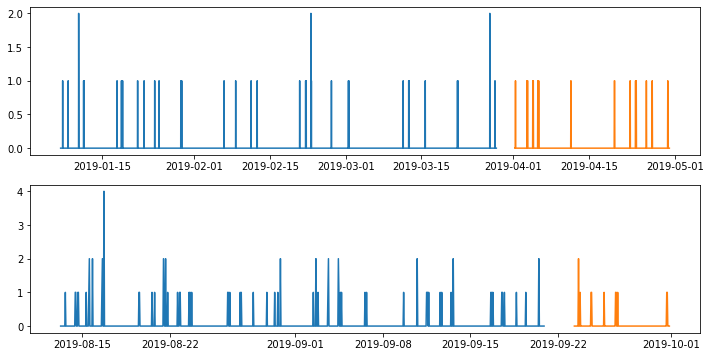

In [52]:
train_clone = train_clone.set_index('Timestamp')
test_clone = test_clone.set_index('Timestamp')
train_clone2 = train_clone2.set_index('Timestamp')
test_clone2 = test_clone2.set_index('Timestamp')

plt.figure(figsize=(12,6))
plt.subplot(211)
plt.plot(train_clone)
plt.plot(test_clone)
plt.subplot(212)
plt.plot(train_clone2)
plt.plot(test_clone2)

In [95]:
df_prophet = train2[['Timestamp', 'Demand']]
df_prophet = df_prophet.rename(columns={'Timestamp': 'ds', 'Demand': 'y'})
df_prophet

,ds,y
0,2019-08-13 07:00:00,0
1,2019-08-13 08:00:00,0
2,2019-08-13 09:00:00,0
3,2019-08-13 10:00:00,0
4,2019-08-13 11:00:00,0
...,...,...
415,2019-09-20 17:00:00,0
416,2019-09-20 18:00:00,0
417,2019-09-20 19:00:00,0
418,2019-09-20 20:00:00,0


In [96]:
from fbprophet import Prophet
import logging

logging.getLogger().setLevel(logging.ERROR)
df_prophet['cap'] = 4
df_prophet['floor'] = 0
m = Prophet(growth='logistic', changepoint_prior_scale=0.8)
# m = Prophet(changepoint_prior_scale=0.9)
m.fit(df_prophet)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [97]:
future = m.make_future_dataframe(periods=2000, freq='H')
future['cap'] = 4
future['floor'] = 0
future = future[(future['ds'].dt.hour >= start) & (future['ds'].dt.hour < stop)]
future = future[future['ds'].dt.dayofweek < 5]
forecast = m.predict(future)
yhat_round = []
for each in forecast['yhat_upper']:
    if(each < 0):
        each = 0
    elif ((each*10)%10 >= 9):
        each = math.ceil(each)
    else:
        each = math.floor(each)
    yhat_round.append(each)
forecast['yhat_nr'] = forecast['yhat']
forecast['yhat'] = yhat_round
forecast[['ds', 'yhat', 'yhat_nr', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_nr,yhat_lower,yhat_upper
0,2019-08-13 07:00:00,0,-0.009140,-0.611432,0.603147
1,2019-08-13 08:00:00,0,-0.076848,-0.731860,0.494134
2,2019-08-13 09:00:00,0,-0.009682,-0.606285,0.563210
3,2019-08-13 10:00:00,0,0.082747,-0.514697,0.742931
4,2019-08-13 11:00:00,0,0.125722,-0.470952,0.686126
...,...,...,...,...,...
1300,2019-12-12 17:00:00,0,0.278669,-0.320598,0.848763
1301,2019-12-12 18:00:00,0,0.198364,-0.395047,0.835835
1302,2019-12-12 19:00:00,0,0.170796,-0.411139,0.774819
1303,2019-12-12 20:00:00,0,0.145763,-0.428983,0.738486


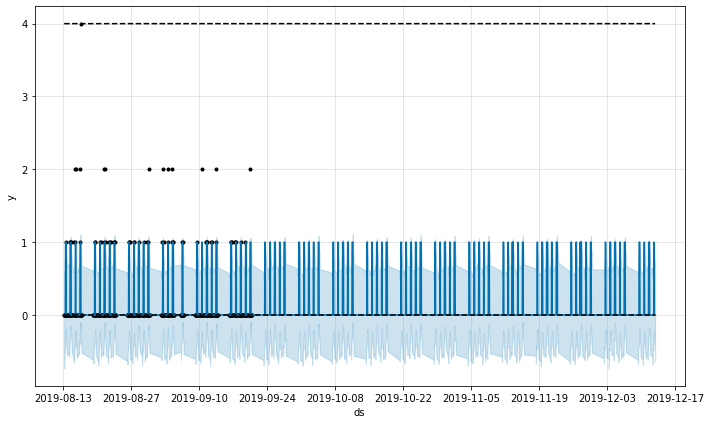

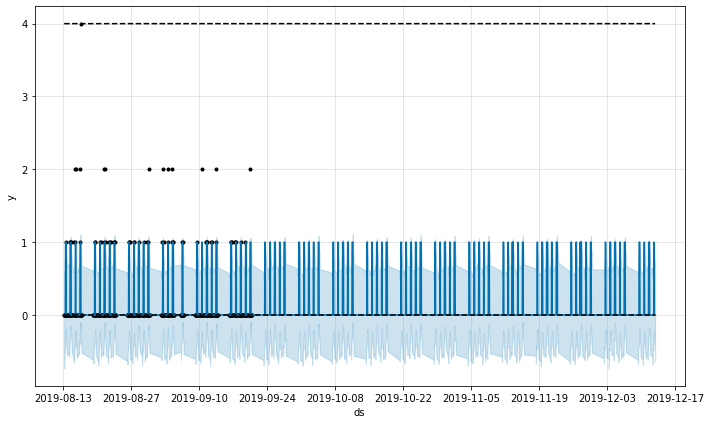

In [98]:
m.plot(forecast)

In [99]:
def join_eva(train, forecast, prediction_size):
    forecast = forecast[:prediction_size]
    
    return forecast.set_index('ds')[['yhat', 'yhat_nr', 'yhat_lower', 'yhat_upper']].join(train.set_index('ds'))

def cal_SMAPE(df):
    smape = 100/len(df) * np.sum(2 * np.abs(df['yhat'] - df['y']) / (np.abs(df['y']) + np.abs(df['yhat'])))
    print(df)
    
    return 'sMAPE', smape, 'accuracy', 100-smape

In [100]:
train = join_eva(df_prophet, forecast, len(df_prophet))

print(cal_SMAPE(train))

                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-08-13 07:00:00     0 -0.009140   -0.611432    0.603147  0    4      0
2019-08-13 08:00:00     0 -0.076848   -0.731860    0.494134  0    4      0
2019-08-13 09:00:00     0 -0.009682   -0.606285    0.563210  0    4      0
2019-08-13 10:00:00     0  0.082747   -0.514697    0.742931  0    4      0
2019-08-13 11:00:00     0  0.125722   -0.470952    0.686126  0    4      0
...                   ...       ...         ...         ... ..  ...    ...
2019-09-20 17:00:00     1  0.372280   -0.231049    0.987755  0    4      0
2019-09-20 18:00:00     0  0.287196   -0.279286    0.898892  0    4      0
2019-09-20 19:00:00     0  0.253071   -0.343973    0.879650  0    4      0
2019-09-20 20:00:00     0  0.219727   -0.350179    0.865404  0    4      0
2019-09-20 21:00:00     0  0.068093   -0.536234    0.691496  0    4      0

[420 rows x 7 columns]
(

In [101]:
def join_test(test, forecast, prediction_size):
    df_test = test.rename(columns={'Timestamp': 'ds', 'Demand': 'y'})
    forecast = forecast[len(df_prophet):len(df_prophet)+prediction_size-75]
    joined = forecast.set_index('ds')[['yhat', 'yhat_nr', 'yhat_lower', 'yhat_upper']].join(df_test.set_index('ds'))
    
    return joined.fillna(0)

In [102]:
eva_df = join_test(test2, forecast, prediction_size)

print(cal_SMAPE(eva_df))

                     yhat   yhat_nr  yhat_lower  yhat_upper    y
ds                                                              
2019-09-23 07:00:00     0  0.004007   -0.621071    0.587148  0.0
2019-09-23 08:00:00     0 -0.057540   -0.694086    0.503233  0.0
2019-09-23 09:00:00     0  0.014381   -0.593867    0.633582  0.0
2019-09-23 10:00:00     0  0.110142   -0.511197    0.693568  0.0
2019-09-23 11:00:00     0  0.155030   -0.430972    0.774081  0.0
...                   ...       ...         ...         ...  ...
2019-09-30 17:00:00     1  0.298728   -0.289651    0.910405  1.0
2019-09-30 18:00:00     0  0.214564   -0.411653    0.804341  0.0
2019-09-30 19:00:00     0  0.182047   -0.426419    0.786443  0.0
2019-09-30 20:00:00     0  0.151091   -0.465328    0.751348  0.0
2019-09-30 21:00:00     0  0.002709   -0.630589    0.577318  0.0

[90 rows x 5 columns]
('sMAPE', 38.51851851851852, 'accuracy', 61.48148148148148)


In [103]:
eva_df['yhat'].value_counts()

0    69
1    21
Name: yhat, dtype: int64

In [104]:
eva_df['y'].value_counts()

0.0    80
1.0     9
2.0     1
Name: y, dtype: int64

In [76]:
scales = np.arange(0.1,1.0,0.1)
rounding_boundary = np.arange(1, 10, 1)

def grid_search():
    scale = [] 
    round_at = []
    eva_acc = []
    test_acc = []
    remark = []
    for param in scales:
        for boundary in rounding_boundary:
            scale.append(param)
            round_at.append(boundary)
            df_prophet['cap'] = 4
            df_prophet['floor'] = 0
            m = Prophet(growth='logistic', changepoint_prior_scale=param)
#             m = Prophet(changepoint_prior_scale=param) 
            m.fit(df_prophet)
            future = m.make_future_dataframe(periods=1000, freq='H')
            future['cap'] = 4
            future['floor'] = 0
            future = future[(future['ds'].dt.hour >= start) & (future['ds'].dt.hour < stop)]
            future = future[future['ds'].dt.dayofweek < 5]
            forecast = m.predict(future)
            yhat_round = []            
            for each in forecast['yhat_upper']:
                if (each < 0):
                    each = 0
                elif (((each*10)%10) >= boundary):
                    each = math.ceil(each)
                else:
                    each = math.floor(each)
                yhat_round.append(each)
                
            forecast['yhat_nr'] = forecast['yhat']
            forecast['yhat'] = yhat_round

            train = join_eva(df_prophet, forecast, len(df_prophet))
            acc = cal_SMAPE(train)
            eva_acc.append(acc)

            eva_df = join_test(test2, forecast, prediction_size)
            acc = cal_SMAPE(eva_df)
            test_acc.append(acc)
            
            zero_counter = 0
            for each in eva_df['yhat']:
                if(each == 0):
                    zero_counter += 1
            
            if(zero_counter == len(eva_df)):
                remark.append('all 0')
            else:
                remark.append('usable')
    
    return scale, round_at, eva_acc, test_acc, remark

In [77]:
scale, round_at, eva_acc, test_acc, remark = grid_search()
grid = {'Scale': scale, 'Round at': round_at, 'Fit': eva_acc, 'Test': test_acc, 'Remark': remark}    
df_grid = pd.DataFrame(grid)
df_grid

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-08-13 07:00:00     1 -0.011403   -0.593432    0.626719  0    4      0
2019-08-13 08:00:00     1 -0.075218   -0.697738    0.545099  0    4      0
2019-08-13 09:00:00     1 -0.007871   -0.636813    0.608414  0    4      0
2019-08-13 10:00:00     1  0.080829   -0.499152    0.703800  0    4      0
2019-08-13 11:00:00     1  0.121113   -0.516833    0.730361  0    4      0
...                   ...       ...         ...         ... ..  ...    ...
2019-09-20 17:00:00     1  0.368406   -0.222683    0.944087  0    4      0
2019-09-20 18:00:00     1  0.283387   -0.356039    0.876309  0    4      0
2019-09-20 19:00:00     1  0.245133   -0.386337    0.801774  0    4      0
2019-09-20 20:00:00     1  0.205033   -0.368887    0.800527  0    4      0
2019-09-20 21:00:00     1  0.054326   -0.534975    0.673298  0    4      0

[420 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-08-13 07:00:00     1 -0.011403   -0.594986    0.613377  0    4      0
2019-08-13 08:00:00     1 -0.075218   -0.636030    0.531136  0    4      0
2019-08-13 09:00:00     1 -0.007871   -0.566353    0.578919  0    4      0
2019-08-13 10:00:00     1  0.080829   -0.538039    0.677644  0    4      0
2019-08-13 11:00:00     1  0.121113   -0.502394    0.768800  0    4      0
...                   ...       ...         ...         ... ..  ...    ...
2019-09-20 17:00:00     1  0.368406   -0.229041    0.944703  0    4      0
2019-09-20 18:00:00     1  0.283387   -0.336654    0.866269  0    4      0
2019-09-20 19:00:00     1  0.245133   -0.339287    0.884403  0    4      0
2019-09-20 20:00:00     1  0.205033   -0.408273    0.781734  0    4      0
2019-09-20 21:00:00     1  0.054326   -0.541440    0.661295  0    4      0

[420 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-08-13 07:00:00     1 -0.011403   -0.647752    0.605190  0    4      0
2019-08-13 08:00:00     1 -0.075218   -0.651590    0.561741  0    4      0
2019-08-13 09:00:00     1 -0.007871   -0.644149    0.552769  0    4      0
2019-08-13 10:00:00     1  0.080829   -0.520811    0.692169  0    4      0
2019-08-13 11:00:00     1  0.121113   -0.479706    0.726712  0    4      0
...                   ...       ...         ...         ... ..  ...    ...
2019-09-20 17:00:00     1  0.368406   -0.264211    0.956384  0    4      0
2019-09-20 18:00:00     1  0.283387   -0.319441    0.885482  0    4      0
2019-09-20 19:00:00     1  0.245133   -0.410648    0.883465  0    4      0
2019-09-20 20:00:00     1  0.205033   -0.407880    0.807639  0    4      0
2019-09-20 21:00:00     1  0.054326   -0.540441    0.655106  0    4      0

[420 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-08-13 07:00:00     1 -0.011403   -0.579055    0.607957  0    4      0
2019-08-13 08:00:00     1 -0.075218   -0.679603    0.538605  0    4      0
2019-08-13 09:00:00     1 -0.007871   -0.629842    0.597132  0    4      0
2019-08-13 10:00:00     1  0.080829   -0.520099    0.724269  0    4      0
2019-08-13 11:00:00     1  0.121113   -0.469936    0.765670  0    4      0
...                   ...       ...         ...         ... ..  ...    ...
2019-09-20 17:00:00     1  0.368406   -0.241500    0.949808  0    4      0
2019-09-20 18:00:00     1  0.283387   -0.324882    0.888581  0    4      0
2019-09-20 19:00:00     1  0.245133   -0.356583    0.879321  0    4      0
2019-09-20 20:00:00     1  0.205033   -0.386588    0.852179  0    4      0
2019-09-20 21:00:00     1  0.054326   -0.570671    0.670467  0    4      0

[420 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-08-13 07:00:00     1 -0.011403   -0.650293    0.636289  0    4      0
2019-08-13 08:00:00     0 -0.075218   -0.695735    0.498089  0    4      0
2019-08-13 09:00:00     1 -0.007871   -0.681731    0.584598  0    4      0
2019-08-13 10:00:00     1  0.080829   -0.504171    0.679015  0    4      0
2019-08-13 11:00:00     1  0.121113   -0.464894    0.736411  0    4      0
...                   ...       ...         ...         ... ..  ...    ...
2019-09-20 17:00:00     1  0.368406   -0.246685    0.990142  0    4      0
2019-09-20 18:00:00     1  0.283387   -0.356141    0.847610  0    4      0
2019-09-20 19:00:00     1  0.245133   -0.387413    0.827253  0    4      0
2019-09-20 20:00:00     1  0.205033   -0.405028    0.829233  0    4      0
2019-09-20 21:00:00     1  0.054326   -0.584764    0.647455  0    4      0

[420 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-08-13 07:00:00     0 -0.011403   -0.648842    0.587848  0    4      0
2019-08-13 08:00:00     0 -0.075218   -0.674839    0.513286  0    4      0
2019-08-13 09:00:00     0 -0.007871   -0.578478    0.575765  0    4      0
2019-08-13 10:00:00     1  0.080829   -0.535430    0.665787  0    4      0
2019-08-13 11:00:00     1  0.121113   -0.445898    0.745113  0    4      0
...                   ...       ...         ...         ... ..  ...    ...
2019-09-20 17:00:00     1  0.368406   -0.223157    1.008465  0    4      0
2019-09-20 18:00:00     1  0.283387   -0.340345    0.910030  0    4      0
2019-09-20 19:00:00     1  0.245133   -0.360416    0.875057  0    4      0
2019-09-20 20:00:00     1  0.205033   -0.406824    0.856784  0    4      0
2019-09-20 21:00:00     1  0.054326   -0.555387    0.655996  0    4      0

[420 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-08-13 07:00:00     0 -0.011403   -0.588693    0.638178  0    4      0
2019-08-13 08:00:00     0 -0.075218   -0.670229    0.506338  0    4      0
2019-08-13 09:00:00     0 -0.007871   -0.567561    0.595828  0    4      0
2019-08-13 10:00:00     0  0.080829   -0.489253    0.681686  0    4      0
2019-08-13 11:00:00     1  0.121113   -0.480895    0.717412  0    4      0
...                   ...       ...         ...         ... ..  ...    ...
2019-09-20 17:00:00     1  0.368406   -0.277388    0.960445  0    4      0
2019-09-20 18:00:00     1  0.283387   -0.281737    0.911461  0    4      0
2019-09-20 19:00:00     1  0.245133   -0.352162    0.838848  0    4      0
2019-09-20 20:00:00     1  0.205033   -0.418409    0.791804  0    4      0
2019-09-20 21:00:00     0  0.054326   -0.552757    0.667415  0    4      0

[420 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-08-13 07:00:00     0 -0.011403   -0.583334    0.624164  0    4      0
2019-08-13 08:00:00     0 -0.075218   -0.678655    0.492239  0    4      0
2019-08-13 09:00:00     0 -0.007871   -0.605842    0.575615  0    4      0
2019-08-13 10:00:00     0  0.080829   -0.541382    0.672752  0    4      0
2019-08-13 11:00:00     0  0.121113   -0.447432    0.708647  0    4      0
...                   ...       ...         ...         ... ..  ...    ...
2019-09-20 17:00:00     1  0.368406   -0.214489    0.983048  0    4      0
2019-09-20 18:00:00     1  0.283387   -0.340364    0.903092  0    4      0
2019-09-20 19:00:00     1  0.245133   -0.385593    0.846940  0    4      0
2019-09-20 20:00:00     0  0.205033   -0.387903    0.772748  0    4      0
2019-09-20 21:00:00     0  0.054326   -0.538823    0.659273  0    4      0

[420 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-08-13 07:00:00     0 -0.011403   -0.608765    0.600490  0    4      0
2019-08-13 08:00:00     0 -0.075218   -0.611165    0.519889  0    4      0
2019-08-13 09:00:00     0 -0.007871   -0.610469    0.584996  0    4      0
2019-08-13 10:00:00     0  0.080829   -0.557751    0.701036  0    4      0
2019-08-13 11:00:00     0  0.121113   -0.479239    0.738351  0    4      0
...                   ...       ...         ...         ... ..  ...    ...
2019-09-20 17:00:00     1  0.368406   -0.257878    0.988242  0    4      0
2019-09-20 18:00:00     0  0.283387   -0.308983    0.894880  0    4      0
2019-09-20 19:00:00     0  0.245133   -0.298069    0.863378  0    4      0
2019-09-20 20:00:00     0  0.205033   -0.387095    0.802901  0    4      0
2019-09-20 21:00:00     0  0.054326   -0.571595    0.678158  0    4      0

[420 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-08-13 07:00:00     1 -0.010951   -0.583471    0.601941  0    4      0
2019-08-13 08:00:00     1 -0.077988   -0.694294    0.526820  0    4      0
2019-08-13 09:00:00     1 -0.011098   -0.646645    0.602296  0    4      0
2019-08-13 10:00:00     1  0.082933   -0.534046    0.675900  0    4      0
2019-08-13 11:00:00     1  0.127918   -0.455831    0.712595  0    4      0
...                   ...       ...         ...         ... ..  ...    ...
2019-09-20 17:00:00     1  0.375380   -0.247012    0.925490  0    4      0
2019-09-20 18:00:00     1  0.290851   -0.305401    0.898101  0    4      0
2019-09-20 19:00:00     1  0.259262   -0.354192    0.871778  0    4      0
2019-09-20 20:00:00     1  0.230211   -0.359800    0.810018  0    4      0
2019-09-20 21:00:00     1  0.079164   -0.521508    0.675232  0    4      0

[420 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-08-13 07:00:00     1 -0.010951   -0.631097    0.624687  0    4      0
2019-08-13 08:00:00     1 -0.077988   -0.632521    0.500263  0    4      0
2019-08-13 09:00:00     1 -0.011098   -0.610729    0.584639  0    4      0
2019-08-13 10:00:00     1  0.082933   -0.531740    0.726052  0    4      0
2019-08-13 11:00:00     1  0.127918   -0.456773    0.679508  0    4      0
...                   ...       ...         ...         ... ..  ...    ...
2019-09-20 17:00:00     1  0.375380   -0.237609    0.999880  0    4      0
2019-09-20 18:00:00     1  0.290851   -0.269558    0.911988  0    4      0
2019-09-20 19:00:00     1  0.259262   -0.356618    0.824126  0    4      0
2019-09-20 20:00:00     1  0.230211   -0.338276    0.857937  0    4      0
2019-09-20 21:00:00     1  0.079164   -0.504116    0.664517  0    4      0

[420 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-08-13 07:00:00     1 -0.010951   -0.603307    0.594595  0    4      0
2019-08-13 08:00:00     1 -0.077988   -0.680401    0.487596  0    4      0
2019-08-13 09:00:00     1 -0.011098   -0.617776    0.628260  0    4      0
2019-08-13 10:00:00     1  0.082933   -0.491018    0.665065  0    4      0
2019-08-13 11:00:00     1  0.127918   -0.443431    0.710548  0    4      0
...                   ...       ...         ...         ... ..  ...    ...
2019-09-20 17:00:00     1  0.375380   -0.258516    1.001052  0    4      0
2019-09-20 18:00:00     1  0.290851   -0.320662    0.904974  0    4      0
2019-09-20 19:00:00     1  0.259262   -0.313435    0.834906  0    4      0
2019-09-20 20:00:00     1  0.230211   -0.388167    0.812578  0    4      0
2019-09-20 21:00:00     1  0.079164   -0.560354    0.698967  0    4      0

[420 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-08-13 07:00:00     1 -0.010951   -0.583941    0.581019  0    4      0
2019-08-13 08:00:00     1 -0.077988   -0.692265    0.535476  0    4      0
2019-08-13 09:00:00     1 -0.011098   -0.639126    0.576263  0    4      0
2019-08-13 10:00:00     1  0.082933   -0.536685    0.671854  0    4      0
2019-08-13 11:00:00     1  0.127918   -0.518678    0.735609  0    4      0
...                   ...       ...         ...         ... ..  ...    ...
2019-09-20 17:00:00     1  0.375380   -0.191581    0.960963  0    4      0
2019-09-20 18:00:00     1  0.290851   -0.325558    0.882352  0    4      0
2019-09-20 19:00:00     1  0.259262   -0.283863    0.858032  0    4      0
2019-09-20 20:00:00     1  0.230211   -0.377244    0.807943  0    4      0
2019-09-20 21:00:00     1  0.079164   -0.539912    0.659268  0    4      0

[420 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-08-13 07:00:00     1 -0.010951   -0.611348    0.611743  0    4      0
2019-08-13 08:00:00     1 -0.077988   -0.680372    0.548112  0    4      0
2019-08-13 09:00:00     1 -0.011098   -0.536511    0.589226  0    4      0
2019-08-13 10:00:00     1  0.082933   -0.504195    0.726844  0    4      0
2019-08-13 11:00:00     1  0.127918   -0.461076    0.713147  0    4      0
...                   ...       ...         ...         ... ..  ...    ...
2019-09-20 17:00:00     1  0.375380   -0.189822    0.941742  0    4      0
2019-09-20 18:00:00     1  0.290851   -0.271663    0.861088  0    4      0
2019-09-20 19:00:00     1  0.259262   -0.344809    0.833073  0    4      0
2019-09-20 20:00:00     1  0.230211   -0.397061    0.774181  0    4      0
2019-09-20 21:00:00     1  0.079164   -0.536758    0.660840  0    4      0

[420 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-08-13 07:00:00     0 -0.010951   -0.623886    0.588489  0    4      0
2019-08-13 08:00:00     0 -0.077988   -0.663248    0.515088  0    4      0
2019-08-13 09:00:00     0 -0.011098   -0.629317    0.598169  0    4      0
2019-08-13 10:00:00     1  0.082933   -0.582933    0.699600  0    4      0
2019-08-13 11:00:00     1  0.127918   -0.503116    0.739946  0    4      0
...                   ...       ...         ...         ... ..  ...    ...
2019-09-20 17:00:00     1  0.375380   -0.211354    1.024908  0    4      0
2019-09-20 18:00:00     1  0.290851   -0.309089    0.881196  0    4      0
2019-09-20 19:00:00     1  0.259262   -0.377266    0.828990  0    4      0
2019-09-20 20:00:00     1  0.230211   -0.322737    0.834430  0    4      0
2019-09-20 21:00:00     1  0.079164   -0.522367    0.710662  0    4      0

[420 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-08-13 07:00:00     0 -0.010951   -0.602766    0.620317  0    4      0
2019-08-13 08:00:00     0 -0.077988   -0.673563    0.524977  0    4      0
2019-08-13 09:00:00     0 -0.011098   -0.577738    0.545517  0    4      0
2019-08-13 10:00:00     0  0.082933   -0.535809    0.690311  0    4      0
2019-08-13 11:00:00     1  0.127918   -0.477960    0.707214  0    4      0
...                   ...       ...         ...         ... ..  ...    ...
2019-09-20 17:00:00     1  0.375380   -0.242491    1.026275  0    4      0
2019-09-20 18:00:00     1  0.290851   -0.300588    0.883286  0    4      0
2019-09-20 19:00:00     1  0.259262   -0.327034    0.853355  0    4      0
2019-09-20 20:00:00     1  0.230211   -0.387823    0.859472  0    4      0
2019-09-20 21:00:00     1  0.079164   -0.520441    0.717403  0    4      0

[420 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-08-13 07:00:00     0 -0.010951   -0.651777    0.586741  0    4      0
2019-08-13 08:00:00     0 -0.077988   -0.612592    0.554474  0    4      0
2019-08-13 09:00:00     0 -0.011098   -0.596930    0.572362  0    4      0
2019-08-13 10:00:00     0  0.082933   -0.514257    0.723549  0    4      0
2019-08-13 11:00:00     0  0.127918   -0.503268    0.722255  0    4      0
...                   ...       ...         ...         ... ..  ...    ...
2019-09-20 17:00:00     1  0.375380   -0.203990    0.986638  0    4      0
2019-09-20 18:00:00     1  0.290851   -0.295527    0.883535  0    4      0
2019-09-20 19:00:00     1  0.259262   -0.365533    0.917066  0    4      0
2019-09-20 20:00:00     1  0.230211   -0.360813    0.864414  0    4      0
2019-09-20 21:00:00     0  0.079164   -0.545512    0.678951  0    4      0

[420 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-08-13 07:00:00     0 -0.010951   -0.647516    0.596390  0    4      0
2019-08-13 08:00:00     0 -0.077988   -0.704723    0.548361  0    4      0
2019-08-13 09:00:00     0 -0.011098   -0.641733    0.562000  0    4      0
2019-08-13 10:00:00     0  0.082933   -0.526313    0.693294  0    4      0
2019-08-13 11:00:00     0  0.127918   -0.445124    0.707971  0    4      0
...                   ...       ...         ...         ... ..  ...    ...
2019-09-20 17:00:00     1  0.375380   -0.225478    0.951665  0    4      0
2019-09-20 18:00:00     0  0.290851   -0.299414    0.872540  0    4      0
2019-09-20 19:00:00     0  0.259262   -0.319589    0.871665  0    4      0
2019-09-20 20:00:00     0  0.230211   -0.357480    0.845622  0    4      0
2019-09-20 21:00:00     0  0.079164   -0.513358    0.673863  0    4      0

[420 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-08-13 07:00:00     1 -0.010587   -0.637163    0.606863  0    4      0
2019-08-13 08:00:00     1 -0.074405   -0.687940    0.513217  0    4      0
2019-08-13 09:00:00     1 -0.008451   -0.580681    0.667765  0    4      0
2019-08-13 10:00:00     1  0.081512   -0.522831    0.659957  0    4      0
2019-08-13 11:00:00     1  0.124147   -0.492577    0.717191  0    4      0
...                   ...       ...         ...         ... ..  ...    ...
2019-09-20 17:00:00     1  0.372511   -0.203908    0.974225  0    4      0
2019-09-20 18:00:00     1  0.287563   -0.335342    0.879060  0    4      0
2019-09-20 19:00:00     1  0.250823   -0.405126    0.858862  0    4      0
2019-09-20 20:00:00     1  0.215007   -0.381137    0.804241  0    4      0
2019-09-20 21:00:00     1  0.067044   -0.542033    0.653177  0    4      0

[420 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-08-13 07:00:00     1 -0.010587   -0.608653    0.621185  0    4      0
2019-08-13 08:00:00     1 -0.074405   -0.683224    0.516494  0    4      0
2019-08-13 09:00:00     1 -0.008451   -0.642127    0.553172  0    4      0
2019-08-13 10:00:00     1  0.081512   -0.572246    0.684313  0    4      0
2019-08-13 11:00:00     1  0.124147   -0.523331    0.747747  0    4      0
...                   ...       ...         ...         ... ..  ...    ...
2019-09-20 17:00:00     1  0.372511   -0.247728    0.984352  0    4      0
2019-09-20 18:00:00     1  0.287563   -0.316442    0.925878  0    4      0
2019-09-20 19:00:00     1  0.250823   -0.332644    0.875418  0    4      0
2019-09-20 20:00:00     1  0.215007   -0.344529    0.813282  0    4      0
2019-09-20 21:00:00     1  0.067044   -0.527442    0.690934  0    4      0

[420 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-08-13 07:00:00     1 -0.010587   -0.624506    0.597439  0    4      0
2019-08-13 08:00:00     1 -0.074405   -0.678512    0.494344  0    4      0
2019-08-13 09:00:00     1 -0.008451   -0.637123    0.596520  0    4      0
2019-08-13 10:00:00     1  0.081512   -0.541384    0.704765  0    4      0
2019-08-13 11:00:00     1  0.124147   -0.472541    0.724188  0    4      0
...                   ...       ...         ...         ... ..  ...    ...
2019-09-20 17:00:00     1  0.372511   -0.230236    0.946844  0    4      0
2019-09-20 18:00:00     1  0.287563   -0.323458    0.919198  0    4      0
2019-09-20 19:00:00     1  0.250823   -0.348367    0.848336  0    4      0
2019-09-20 20:00:00     1  0.215007   -0.374404    0.815169  0    4      0
2019-09-20 21:00:00     1  0.067044   -0.520793    0.679517  0    4      0

[420 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-08-13 07:00:00     1 -0.010587   -0.659072    0.587512  0    4      0
2019-08-13 08:00:00     1 -0.074405   -0.722522    0.510289  0    4      0
2019-08-13 09:00:00     1 -0.008451   -0.618138    0.612896  0    4      0
2019-08-13 10:00:00     1  0.081512   -0.501063    0.696541  0    4      0
2019-08-13 11:00:00     1  0.124147   -0.439070    0.766053  0    4      0
...                   ...       ...         ...         ... ..  ...    ...
2019-09-20 17:00:00     1  0.372511   -0.267279    0.954625  0    4      0
2019-09-20 18:00:00     1  0.287563   -0.321407    0.882355  0    4      0
2019-09-20 19:00:00     1  0.250823   -0.363397    0.805376  0    4      0
2019-09-20 20:00:00     1  0.215007   -0.361157    0.829000  0    4      0
2019-09-20 21:00:00     1  0.067044   -0.533739    0.669639  0    4      0

[420 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-08-13 07:00:00     1 -0.010587   -0.579815    0.547995  0    4      0
2019-08-13 08:00:00     1 -0.074405   -0.706243    0.548873  0    4      0
2019-08-13 09:00:00     1 -0.008451   -0.619592    0.621830  0    4      0
2019-08-13 10:00:00     1  0.081512   -0.587308    0.641805  0    4      0
2019-08-13 11:00:00     1  0.124147   -0.507119    0.735827  0    4      0
...                   ...       ...         ...         ... ..  ...    ...
2019-09-20 17:00:00     1  0.372511   -0.143300    0.996797  0    4      0
2019-09-20 18:00:00     1  0.287563   -0.287401    0.868490  0    4      0
2019-09-20 19:00:00     1  0.250823   -0.366716    0.808357  0    4      0
2019-09-20 20:00:00     1  0.215007   -0.347567    0.791033  0    4      0
2019-09-20 21:00:00     1  0.067044   -0.495451    0.649860  0    4      0

[420 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-08-13 07:00:00     1 -0.010587   -0.599221    0.632164  0    4      0
2019-08-13 08:00:00     0 -0.074405   -0.726745    0.517746  0    4      0
2019-08-13 09:00:00     1 -0.008451   -0.655103    0.611596  0    4      0
2019-08-13 10:00:00     1  0.081512   -0.523149    0.689416  0    4      0
2019-08-13 11:00:00     1  0.124147   -0.528227    0.708612  0    4      0
...                   ...       ...         ...         ... ..  ...    ...
2019-09-20 17:00:00     1  0.372511   -0.289842    0.953636  0    4      0
2019-09-20 18:00:00     1  0.287563   -0.290474    0.909167  0    4      0
2019-09-20 19:00:00     1  0.250823   -0.357715    0.883172  0    4      0
2019-09-20 20:00:00     1  0.215007   -0.378709    0.825459  0    4      0
2019-09-20 21:00:00     1  0.067044   -0.529136    0.658280  0    4      0

[420 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-08-13 07:00:00     0 -0.010587   -0.614735    0.612920  0    4      0
2019-08-13 08:00:00     0 -0.074405   -0.683179    0.536135  0    4      0
2019-08-13 09:00:00     0 -0.008451   -0.611180    0.629110  0    4      0
2019-08-13 10:00:00     1  0.081512   -0.497105    0.718930  0    4      0
2019-08-13 11:00:00     1  0.124147   -0.457951    0.774446  0    4      0
...                   ...       ...         ...         ... ..  ...    ...
2019-09-20 17:00:00     1  0.372511   -0.223877    1.022891  0    4      0
2019-09-20 18:00:00     1  0.287563   -0.309447    0.880903  0    4      0
2019-09-20 19:00:00     1  0.250823   -0.365259    0.831700  0    4      0
2019-09-20 20:00:00     1  0.215007   -0.429334    0.832346  0    4      0
2019-09-20 21:00:00     0  0.067044   -0.559962    0.689181  0    4      0

[420 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-08-13 07:00:00     0 -0.010587   -0.628316    0.557692  0    4      0
2019-08-13 08:00:00     0 -0.074405   -0.699754    0.553301  0    4      0
2019-08-13 09:00:00     0 -0.008451   -0.611087    0.593459  0    4      0
2019-08-13 10:00:00     0  0.081512   -0.583867    0.618311  0    4      0
2019-08-13 11:00:00     0  0.124147   -0.495563    0.753183  0    4      0
...                   ...       ...         ...         ... ..  ...    ...
2019-09-20 17:00:00     1  0.372511   -0.226636    0.983333  0    4      0
2019-09-20 18:00:00     1  0.287563   -0.299646    0.920333  0    4      0
2019-09-20 19:00:00     1  0.250823   -0.359234    0.859048  0    4      0
2019-09-20 20:00:00     1  0.215007   -0.377284    0.800355  0    4      0
2019-09-20 21:00:00     0  0.067044   -0.538748    0.650318  0    4      0

[420 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-08-13 07:00:00     0 -0.010587   -0.647020    0.602458  0    4      0
2019-08-13 08:00:00     0 -0.074405   -0.697702    0.536452  0    4      0
2019-08-13 09:00:00     0 -0.008451   -0.604516    0.606154  0    4      0
2019-08-13 10:00:00     0  0.081512   -0.488819    0.660376  0    4      0
2019-08-13 11:00:00     0  0.124147   -0.465978    0.761824  0    4      0
...                   ...       ...         ...         ... ..  ...    ...
2019-09-20 17:00:00     1  0.372511   -0.260866    0.952181  0    4      0
2019-09-20 18:00:00     0  0.287563   -0.304776    0.823036  0    4      0
2019-09-20 19:00:00     0  0.250823   -0.361847    0.826699  0    4      0
2019-09-20 20:00:00     0  0.215007   -0.374231    0.789013  0    4      0
2019-09-20 21:00:00     0  0.067044   -0.573715    0.666659  0    4      0

[420 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-08-13 07:00:00     1 -0.009269   -0.608606    0.615583  0    4      0
2019-08-13 08:00:00     1 -0.076811   -0.667884    0.473650  0    4      0
2019-08-13 09:00:00     1 -0.009670   -0.613336    0.621512  0    4      0
2019-08-13 10:00:00     1  0.082690   -0.529897    0.681730  0    4      0
2019-08-13 11:00:00     1  0.125665   -0.500247    0.726834  0    4      0
...                   ...       ...         ...         ... ..  ...    ...
2019-09-20 17:00:00     1  0.372425   -0.219273    0.960511  0    4      0
2019-09-20 18:00:00     1  0.287343   -0.299147    0.847335  0    4      0
2019-09-20 19:00:00     1  0.253096   -0.353201    0.873135  0    4      0
2019-09-20 20:00:00     1  0.219643   -0.449229    0.802038  0    4      0
2019-09-20 21:00:00     1  0.068153   -0.550400    0.723842  0    4      0

[420 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-08-13 07:00:00     1 -0.009269   -0.595909    0.612581  0    4      0
2019-08-13 08:00:00     1 -0.076811   -0.639462    0.551110  0    4      0
2019-08-13 09:00:00     1 -0.009670   -0.586508    0.633835  0    4      0
2019-08-13 10:00:00     1  0.082690   -0.487619    0.647355  0    4      0
2019-08-13 11:00:00     1  0.125665   -0.508173    0.717587  0    4      0
...                   ...       ...         ...         ... ..  ...    ...
2019-09-20 17:00:00     1  0.372425   -0.277169    0.956813  0    4      0
2019-09-20 18:00:00     1  0.287343   -0.333120    0.876882  0    4      0
2019-09-20 19:00:00     1  0.253096   -0.324713    0.813778  0    4      0
2019-09-20 20:00:00     1  0.219643   -0.382414    0.798820  0    4      0
2019-09-20 21:00:00     1  0.068153   -0.535899    0.709654  0    4      0

[420 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-08-13 07:00:00     1 -0.009269   -0.603499    0.587310  0    4      0
2019-08-13 08:00:00     1 -0.076811   -0.672555    0.505809  0    4      0
2019-08-13 09:00:00     1 -0.009670   -0.640136    0.632715  0    4      0
2019-08-13 10:00:00     1  0.082690   -0.586461    0.715972  0    4      0
2019-08-13 11:00:00     1  0.125665   -0.472235    0.732464  0    4      0
...                   ...       ...         ...         ... ..  ...    ...
2019-09-20 17:00:00     1  0.372425   -0.221800    1.005007  0    4      0
2019-09-20 18:00:00     1  0.287343   -0.315239    0.880950  0    4      0
2019-09-20 19:00:00     1  0.253096   -0.335580    0.903497  0    4      0
2019-09-20 20:00:00     1  0.219643   -0.365423    0.845916  0    4      0
2019-09-20 21:00:00     1  0.068153   -0.557426    0.656130  0    4      0

[420 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-08-13 07:00:00     1 -0.009269   -0.630789    0.578115  0    4      0
2019-08-13 08:00:00     1 -0.076811   -0.663397    0.559018  0    4      0
2019-08-13 09:00:00     1 -0.009670   -0.620776    0.589228  0    4      0
2019-08-13 10:00:00     1  0.082690   -0.492134    0.672636  0    4      0
2019-08-13 11:00:00     1  0.125665   -0.466188    0.740319  0    4      0
...                   ...       ...         ...         ... ..  ...    ...
2019-09-20 17:00:00     1  0.372425   -0.207198    0.997872  0    4      0
2019-09-20 18:00:00     1  0.287343   -0.279041    0.883672  0    4      0
2019-09-20 19:00:00     1  0.253096   -0.373644    0.829733  0    4      0
2019-09-20 20:00:00     1  0.219643   -0.398346    0.826441  0    4      0
2019-09-20 21:00:00     1  0.068153   -0.612923    0.644780  0    4      0

[420 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-08-13 07:00:00     1 -0.009269   -0.589502    0.595635  0    4      0
2019-08-13 08:00:00     0 -0.076811   -0.687305    0.496885  0    4      0
2019-08-13 09:00:00     1 -0.009670   -0.600777    0.603273  0    4      0
2019-08-13 10:00:00     1  0.082690   -0.547157    0.658087  0    4      0
2019-08-13 11:00:00     1  0.125665   -0.469572    0.793304  0    4      0
...                   ...       ...         ...         ... ..  ...    ...
2019-09-20 17:00:00     1  0.372425   -0.230654    1.029748  0    4      0
2019-09-20 18:00:00     1  0.287343   -0.350728    0.875676  0    4      0
2019-09-20 19:00:00     1  0.253096   -0.378445    0.820827  0    4      0
2019-09-20 20:00:00     1  0.219643   -0.434588    0.796641  0    4      0
2019-09-20 21:00:00     1  0.068153   -0.556880    0.690095  0    4      0

[420 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-08-13 07:00:00     0 -0.009269   -0.562894    0.588808  0    4      0
2019-08-13 08:00:00     0 -0.076811   -0.698995    0.530424  0    4      0
2019-08-13 09:00:00     1 -0.009670   -0.603785    0.607439  0    4      0
2019-08-13 10:00:00     1  0.082690   -0.544757    0.668232  0    4      0
2019-08-13 11:00:00     1  0.125665   -0.420976    0.700956  0    4      0
...                   ...       ...         ...         ... ..  ...    ...
2019-09-20 17:00:00     1  0.372425   -0.231658    1.000700  0    4      0
2019-09-20 18:00:00     1  0.287343   -0.345549    0.867480  0    4      0
2019-09-20 19:00:00     1  0.253096   -0.339008    0.857813  0    4      0
2019-09-20 20:00:00     1  0.219643   -0.377686    0.791725  0    4      0
2019-09-20 21:00:00     1  0.068153   -0.502914    0.668255  0    4      0

[420 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-08-13 07:00:00     0 -0.009269   -0.643494    0.608286  0    4      0
2019-08-13 08:00:00     0 -0.076811   -0.649572    0.505816  0    4      0
2019-08-13 09:00:00     0 -0.009670   -0.634251    0.576610  0    4      0
2019-08-13 10:00:00     1  0.082690   -0.492533    0.709159  0    4      0
2019-08-13 11:00:00     1  0.125665   -0.465987    0.705788  0    4      0
...                   ...       ...         ...         ... ..  ...    ...
2019-09-20 17:00:00     1  0.372425   -0.224831    0.974938  0    4      0
2019-09-20 18:00:00     1  0.287343   -0.360770    0.874858  0    4      0
2019-09-20 19:00:00     1  0.253096   -0.333125    0.861414  0    4      0
2019-09-20 20:00:00     1  0.219643   -0.366656    0.814720  0    4      0
2019-09-20 21:00:00     0  0.068153   -0.560988    0.652517  0    4      0

[420 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-08-13 07:00:00     0 -0.009269   -0.604179    0.594674  0    4      0
2019-08-13 08:00:00     0 -0.076811   -0.705249    0.532050  0    4      0
2019-08-13 09:00:00     0 -0.009670   -0.586789    0.648901  0    4      0
2019-08-13 10:00:00     0  0.082690   -0.500422    0.687934  0    4      0
2019-08-13 11:00:00     0  0.125665   -0.504212    0.725971  0    4      0
...                   ...       ...         ...         ... ..  ...    ...
2019-09-20 17:00:00     1  0.372425   -0.245319    0.929785  0    4      0
2019-09-20 18:00:00     1  0.287343   -0.316698    0.904488  0    4      0
2019-09-20 19:00:00     1  0.253096   -0.361959    0.821284  0    4      0
2019-09-20 20:00:00     1  0.219643   -0.369547    0.819763  0    4      0
2019-09-20 21:00:00     0  0.068153   -0.520599    0.640294  0    4      0

[420 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-08-13 07:00:00     0 -0.009269   -0.621204    0.586548  0    4      0
2019-08-13 08:00:00     0 -0.076811   -0.668589    0.537662  0    4      0
2019-08-13 09:00:00     0 -0.009670   -0.602333    0.600624  0    4      0
2019-08-13 10:00:00     0  0.082690   -0.524425    0.641507  0    4      0
2019-08-13 11:00:00     0  0.125665   -0.460607    0.765514  0    4      0
...                   ...       ...         ...         ... ..  ...    ...
2019-09-20 17:00:00     1  0.372425   -0.272642    0.969290  0    4      0
2019-09-20 18:00:00     1  0.287343   -0.300670    0.940290  0    4      0
2019-09-20 19:00:00     0  0.253096   -0.341912    0.849248  0    4      0
2019-09-20 20:00:00     0  0.219643   -0.402820    0.858545  0    4      0
2019-09-20 21:00:00     0  0.068153   -0.535036    0.663620  0    4      0

[420 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-08-13 07:00:00     1 -0.010208   -0.617708    0.607895  0    4      0
2019-08-13 08:00:00     1 -0.077609   -0.708792    0.531388  0    4      0
2019-08-13 09:00:00     1 -0.009914   -0.575176    0.582209  0    4      0
2019-08-13 10:00:00     1  0.082809   -0.541635    0.676830  0    4      0
2019-08-13 11:00:00     1  0.125665   -0.504098    0.730366  0    4      0
...                   ...       ...         ...         ... ..  ...    ...
2019-09-20 17:00:00     1  0.371886   -0.255014    0.945292  0    4      0
2019-09-20 18:00:00     1  0.287194   -0.250743    0.886341  0    4      0
2019-09-20 19:00:00     1  0.253985   -0.348020    0.834753  0    4      0
2019-09-20 20:00:00     1  0.221145   -0.350266    0.834949  0    4      0
2019-09-20 21:00:00     1  0.068296   -0.559610    0.693482  0    4      0

[420 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-08-13 07:00:00     1 -0.010208   -0.562832    0.612342  0    4      0
2019-08-13 08:00:00     1 -0.077609   -0.666220    0.547242  0    4      0
2019-08-13 09:00:00     1 -0.009914   -0.656646    0.585243  0    4      0
2019-08-13 10:00:00     1  0.082809   -0.517814    0.690689  0    4      0
2019-08-13 11:00:00     1  0.125665   -0.484960    0.732763  0    4      0
...                   ...       ...         ...         ... ..  ...    ...
2019-09-20 17:00:00     1  0.371886   -0.245881    1.004641  0    4      0
2019-09-20 18:00:00     1  0.287194   -0.334959    0.886726  0    4      0
2019-09-20 19:00:00     1  0.253985   -0.332969    0.843225  0    4      0
2019-09-20 20:00:00     1  0.221145   -0.425139    0.812362  0    4      0
2019-09-20 21:00:00     1  0.068296   -0.537303    0.677080  0    4      0

[420 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-08-13 07:00:00     1 -0.010208   -0.608379    0.582904  0    4      0
2019-08-13 08:00:00     1 -0.077609   -0.696382    0.537179  0    4      0
2019-08-13 09:00:00     1 -0.009914   -0.649192    0.542183  0    4      0
2019-08-13 10:00:00     1  0.082809   -0.539178    0.654358  0    4      0
2019-08-13 11:00:00     1  0.125665   -0.495490    0.740556  0    4      0
...                   ...       ...         ...         ... ..  ...    ...
2019-09-20 17:00:00     1  0.371886   -0.196402    0.983608  0    4      0
2019-09-20 18:00:00     1  0.287194   -0.313571    0.866835  0    4      0
2019-09-20 19:00:00     1  0.253985   -0.320274    0.895883  0    4      0
2019-09-20 20:00:00     1  0.221145   -0.386343    0.825881  0    4      0
2019-09-20 21:00:00     1  0.068296   -0.531515    0.704370  0    4      0

[420 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-08-13 07:00:00     1 -0.010208   -0.618010    0.560339  0    4      0
2019-08-13 08:00:00     1 -0.077609   -0.680805    0.589359  0    4      0
2019-08-13 09:00:00     1 -0.009914   -0.616656    0.544435  0    4      0
2019-08-13 10:00:00     1  0.082809   -0.542396    0.675672  0    4      0
2019-08-13 11:00:00     1  0.125665   -0.502189    0.741815  0    4      0
...                   ...       ...         ...         ... ..  ...    ...
2019-09-20 17:00:00     1  0.371886   -0.160820    1.005085  0    4      0
2019-09-20 18:00:00     1  0.287194   -0.320156    0.854083  0    4      0
2019-09-20 19:00:00     1  0.253985   -0.363912    0.867422  0    4      0
2019-09-20 20:00:00     1  0.221145   -0.425646    0.838985  0    4      0
2019-09-20 21:00:00     1  0.068296   -0.504260    0.644930  0    4      0

[420 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-08-13 07:00:00     1 -0.010208   -0.655639    0.524445  0    4      0
2019-08-13 08:00:00     1 -0.077609   -0.690872    0.549148  0    4      0
2019-08-13 09:00:00     1 -0.009914   -0.617768    0.626517  0    4      0
2019-08-13 10:00:00     1  0.082809   -0.526582    0.655994  0    4      0
2019-08-13 11:00:00     1  0.125665   -0.436875    0.753799  0    4      0
...                   ...       ...         ...         ... ..  ...    ...
2019-09-20 17:00:00     1  0.371886   -0.245587    0.960382  0    4      0
2019-09-20 18:00:00     1  0.287194   -0.314589    0.889550  0    4      0
2019-09-20 19:00:00     1  0.253985   -0.325808    0.865830  0    4      0
2019-09-20 20:00:00     1  0.221145   -0.377303    0.821495  0    4      0
2019-09-20 21:00:00     1  0.068296   -0.541420    0.657413  0    4      0

[420 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-08-13 07:00:00     0 -0.010208   -0.618554    0.598878  0    4      0
2019-08-13 08:00:00     0 -0.077609   -0.710013    0.504645  0    4      0
2019-08-13 09:00:00     0 -0.009914   -0.621216    0.560539  0    4      0
2019-08-13 10:00:00     1  0.082809   -0.494903    0.714503  0    4      0
2019-08-13 11:00:00     1  0.125665   -0.480534    0.698199  0    4      0
...                   ...       ...         ...         ... ..  ...    ...
2019-09-20 17:00:00     1  0.371886   -0.199977    0.970390  0    4      0
2019-09-20 18:00:00     1  0.287194   -0.317159    0.898428  0    4      0
2019-09-20 19:00:00     1  0.253985   -0.339453    0.858818  0    4      0
2019-09-20 20:00:00     1  0.221145   -0.409469    0.816827  0    4      0
2019-09-20 21:00:00     1  0.068296   -0.512761    0.645215  0    4      0

[420 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-08-13 07:00:00     0 -0.010208   -0.619704    0.557379  0    4      0
2019-08-13 08:00:00     0 -0.077609   -0.671381    0.533856  0    4      0
2019-08-13 09:00:00     0 -0.009914   -0.661981    0.590283  0    4      0
2019-08-13 10:00:00     0  0.082809   -0.505522    0.686779  0    4      0
2019-08-13 11:00:00     1  0.125665   -0.484419    0.734259  0    4      0
...                   ...       ...         ...         ... ..  ...    ...
2019-09-20 17:00:00     1  0.371886   -0.198467    0.994476  0    4      0
2019-09-20 18:00:00     1  0.287194   -0.307256    0.866344  0    4      0
2019-09-20 19:00:00     1  0.253985   -0.343978    0.866199  0    4      0
2019-09-20 20:00:00     1  0.221145   -0.348562    0.840350  0    4      0
2019-09-20 21:00:00     0  0.068296   -0.568268    0.661141  0    4      0

[420 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-08-13 07:00:00     0 -0.010208   -0.579813    0.613819  0    4      0
2019-08-13 08:00:00     0 -0.077609   -0.694666    0.502402  0    4      0
2019-08-13 09:00:00     0 -0.009914   -0.626975    0.601636  0    4      0
2019-08-13 10:00:00     0  0.082809   -0.525969    0.696572  0    4      0
2019-08-13 11:00:00     0  0.125665   -0.462029    0.697528  0    4      0
...                   ...       ...         ...         ... ..  ...    ...
2019-09-20 17:00:00     1  0.371886   -0.201856    0.964145  0    4      0
2019-09-20 18:00:00     1  0.287194   -0.301623    0.881592  0    4      0
2019-09-20 19:00:00     1  0.253985   -0.369938    0.854061  0    4      0
2019-09-20 20:00:00     1  0.221145   -0.340732    0.800772  0    4      0
2019-09-20 21:00:00     0  0.068296   -0.522154    0.643634  0    4      0

[420 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-08-13 07:00:00     0 -0.010208   -0.608280    0.587803  0    4      0
2019-08-13 08:00:00     0 -0.077609   -0.655124    0.525993  0    4      0
2019-08-13 09:00:00     0 -0.009914   -0.594687    0.584125  0    4      0
2019-08-13 10:00:00     0  0.082809   -0.474711    0.693236  0    4      0
2019-08-13 11:00:00     0  0.125665   -0.505921    0.773617  0    4      0
...                   ...       ...         ...         ... ..  ...    ...
2019-09-20 17:00:00     1  0.371886   -0.278157    0.933161  0    4      0
2019-09-20 18:00:00     0  0.287194   -0.274401    0.886136  0    4      0
2019-09-20 19:00:00     0  0.253985   -0.383701    0.887664  0    4      0
2019-09-20 20:00:00     0  0.221145   -0.391449    0.815128  0    4      0
2019-09-20 21:00:00     0  0.068296   -0.568594    0.678270  0    4      0

[420 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-08-13 07:00:00     1 -0.007945   -0.583120    0.585509  0    4      0
2019-08-13 08:00:00     1 -0.076651   -0.661062    0.534021  0    4      0
2019-08-13 09:00:00     1 -0.009148   -0.539648    0.587158  0    4      0
2019-08-13 10:00:00     1  0.082784   -0.485732    0.687259  0    4      0
2019-08-13 11:00:00     1  0.124707   -0.516198    0.725352  0    4      0
...                   ...       ...         ...         ... ..  ...    ...
2019-09-20 17:00:00     1  0.370605   -0.227798    0.942049  0    4      0
2019-09-20 18:00:00     1  0.285219   -0.350815    0.893417  0    4      0
2019-09-20 19:00:00     1  0.250134   -0.343303    0.872414  0    4      0
2019-09-20 20:00:00     1  0.214801   -0.381816    0.837657  0    4      0
2019-09-20 21:00:00     1  0.062184   -0.518333    0.654953  0    4      0

[420 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-08-13 07:00:00     1 -0.007945   -0.548941    0.595245  0    4      0
2019-08-13 08:00:00     1 -0.076651   -0.690324    0.537809  0    4      0
2019-08-13 09:00:00     1 -0.009148   -0.628813    0.575467  0    4      0
2019-08-13 10:00:00     1  0.082784   -0.510577    0.659039  0    4      0
2019-08-13 11:00:00     1  0.124707   -0.488605    0.708040  0    4      0
...                   ...       ...         ...         ... ..  ...    ...
2019-09-20 17:00:00     1  0.370605   -0.195610    0.987053  0    4      0
2019-09-20 18:00:00     1  0.285219   -0.286678    0.892830  0    4      0
2019-09-20 19:00:00     1  0.250134   -0.363592    0.823644  0    4      0
2019-09-20 20:00:00     1  0.214801   -0.421942    0.789132  0    4      0
2019-09-20 21:00:00     1  0.062184   -0.577682    0.659521  0    4      0

[420 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-08-13 07:00:00     1 -0.007945   -0.602287    0.581909  0    4      0
2019-08-13 08:00:00     1 -0.076651   -0.659342    0.524960  0    4      0
2019-08-13 09:00:00     1 -0.009148   -0.615621    0.581746  0    4      0
2019-08-13 10:00:00     1  0.082784   -0.558295    0.639096  0    4      0
2019-08-13 11:00:00     1  0.124707   -0.481190    0.711249  0    4      0
...                   ...       ...         ...         ... ..  ...    ...
2019-09-20 17:00:00     1  0.370605   -0.242508    0.978778  0    4      0
2019-09-20 18:00:00     1  0.285219   -0.293634    0.914181  0    4      0
2019-09-20 19:00:00     1  0.250134   -0.322399    0.865187  0    4      0
2019-09-20 20:00:00     1  0.214801   -0.403569    0.813122  0    4      0
2019-09-20 21:00:00     1  0.062184   -0.513077    0.655084  0    4      0

[420 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-08-13 07:00:00     1 -0.007945   -0.616522    0.597810  0    4      0
2019-08-13 08:00:00     1 -0.076651   -0.736408    0.509689  0    4      0
2019-08-13 09:00:00     1 -0.009148   -0.625994    0.599840  0    4      0
2019-08-13 10:00:00     1  0.082784   -0.538276    0.704702  0    4      0
2019-08-13 11:00:00     1  0.124707   -0.476459    0.740306  0    4      0
...                   ...       ...         ...         ... ..  ...    ...
2019-09-20 17:00:00     1  0.370605   -0.239514    0.962068  0    4      0
2019-09-20 18:00:00     1  0.285219   -0.269727    0.871369  0    4      0
2019-09-20 19:00:00     1  0.250134   -0.349085    0.855790  0    4      0
2019-09-20 20:00:00     1  0.214801   -0.386289    0.772535  0    4      0
2019-09-20 21:00:00     1  0.062184   -0.551057    0.680982  0    4      0

[420 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-08-13 07:00:00     1 -0.007945   -0.672695    0.646787  0    4      0
2019-08-13 08:00:00     1 -0.076651   -0.708767    0.549919  0    4      0
2019-08-13 09:00:00     1 -0.009148   -0.590584    0.610374  0    4      0
2019-08-13 10:00:00     1  0.082784   -0.545005    0.650883  0    4      0
2019-08-13 11:00:00     1  0.124707   -0.499642    0.724447  0    4      0
...                   ...       ...         ...         ... ..  ...    ...
2019-09-20 17:00:00     1  0.370605   -0.278260    0.944396  0    4      0
2019-09-20 18:00:00     1  0.285219   -0.329945    0.878016  0    4      0
2019-09-20 19:00:00     1  0.250134   -0.382661    0.851492  0    4      0
2019-09-20 20:00:00     1  0.214801   -0.385128    0.801097  0    4      0
2019-09-20 21:00:00     1  0.062184   -0.524425    0.706490  0    4      0

[420 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-08-13 07:00:00     0 -0.007945   -0.619466    0.582229  0    4      0
2019-08-13 08:00:00     0 -0.076651   -0.702972    0.519884  0    4      0
2019-08-13 09:00:00     0 -0.009148   -0.647041    0.564988  0    4      0
2019-08-13 10:00:00     1  0.082784   -0.547329    0.715958  0    4      0
2019-08-13 11:00:00     1  0.124707   -0.457701    0.734159  0    4      0
...                   ...       ...         ...         ... ..  ...    ...
2019-09-20 17:00:00     1  0.370605   -0.248387    0.980767  0    4      0
2019-09-20 18:00:00     1  0.285219   -0.297537    0.897403  0    4      0
2019-09-20 19:00:00     1  0.250134   -0.347855    0.870512  0    4      0
2019-09-20 20:00:00     1  0.214801   -0.407125    0.777062  0    4      0
2019-09-20 21:00:00     1  0.062184   -0.593905    0.666219  0    4      0

[420 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-08-13 07:00:00     0 -0.007945   -0.569011    0.552738  0    4      0
2019-08-13 08:00:00     0 -0.076651   -0.657403    0.524489  0    4      0
2019-08-13 09:00:00     0 -0.009148   -0.598300    0.591456  0    4      0
2019-08-13 10:00:00     0  0.082784   -0.545701    0.634510  0    4      0
2019-08-13 11:00:00     1  0.124707   -0.467913    0.775265  0    4      0
...                   ...       ...         ...         ... ..  ...    ...
2019-09-20 17:00:00     1  0.370605   -0.254201    1.029866  0    4      0
2019-09-20 18:00:00     1  0.285219   -0.317567    0.882571  0    4      0
2019-09-20 19:00:00     1  0.250134   -0.338806    0.889485  0    4      0
2019-09-20 20:00:00     1  0.214801   -0.376008    0.794810  0    4      0
2019-09-20 21:00:00     0  0.062184   -0.562821    0.684459  0    4      0

[420 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-08-13 07:00:00     0 -0.007945   -0.623049    0.570130  0    4      0
2019-08-13 08:00:00     0 -0.076651   -0.686873    0.543839  0    4      0
2019-08-13 09:00:00     0 -0.009148   -0.603385    0.566928  0    4      0
2019-08-13 10:00:00     0  0.082784   -0.511819    0.670817  0    4      0
2019-08-13 11:00:00     0  0.124707   -0.468872    0.694970  0    4      0
...                   ...       ...         ...         ... ..  ...    ...
2019-09-20 17:00:00     1  0.370605   -0.197026    0.997449  0    4      0
2019-09-20 18:00:00     1  0.285219   -0.367363    0.879037  0    4      0
2019-09-20 19:00:00     1  0.250134   -0.351330    0.880689  0    4      0
2019-09-20 20:00:00     1  0.214801   -0.379166    0.825012  0    4      0
2019-09-20 21:00:00     0  0.062184   -0.537483    0.644759  0    4      0

[420 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-08-13 07:00:00     0 -0.007945   -0.565274    0.622842  0    4      0
2019-08-13 08:00:00     0 -0.076651   -0.658439    0.529226  0    4      0
2019-08-13 09:00:00     0 -0.009148   -0.575881    0.613138  0    4      0
2019-08-13 10:00:00     0  0.082784   -0.536876    0.676347  0    4      0
2019-08-13 11:00:00     0  0.124707   -0.469966    0.734863  0    4      0
...                   ...       ...         ...         ... ..  ...    ...
2019-09-20 17:00:00     1  0.370605   -0.198844    0.954176  0    4      0
2019-09-20 18:00:00     1  0.285219   -0.328031    0.905926  0    4      0
2019-09-20 19:00:00     0  0.250134   -0.369408    0.857451  0    4      0
2019-09-20 20:00:00     0  0.214801   -0.406998    0.804246  0    4      0
2019-09-20 21:00:00     0  0.062184   -0.516868    0.651614  0    4      0

[420 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-08-13 07:00:00     1 -0.009153   -0.612107    0.581238  0    4      0
2019-08-13 08:00:00     1 -0.076971   -0.714229    0.506559  0    4      0
2019-08-13 09:00:00     1 -0.009696   -0.575317    0.602428  0    4      0
2019-08-13 10:00:00     1  0.082868   -0.520914    0.684332  0    4      0
2019-08-13 11:00:00     1  0.125840   -0.485170    0.697189  0    4      0
...                   ...       ...         ...         ... ..  ...    ...
2019-09-20 17:00:00     1  0.372371   -0.231373    0.979340  0    4      0
2019-09-20 18:00:00     1  0.287270   -0.351423    0.859234  0    4      0
2019-09-20 19:00:00     1  0.253319   -0.366712    0.832308  0    4      0
2019-09-20 20:00:00     1  0.220200   -0.329830    0.866402  0    4      0
2019-09-20 21:00:00     1  0.068472   -0.518210    0.675829  0    4      0

[420 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-08-13 07:00:00     1 -0.009153   -0.598371    0.584644  0    4      0
2019-08-13 08:00:00     1 -0.076971   -0.646087    0.517716  0    4      0
2019-08-13 09:00:00     1 -0.009696   -0.634833    0.612970  0    4      0
2019-08-13 10:00:00     1  0.082868   -0.535556    0.648949  0    4      0
2019-08-13 11:00:00     1  0.125840   -0.519506    0.736020  0    4      0
...                   ...       ...         ...         ... ..  ...    ...
2019-09-20 17:00:00     1  0.372371   -0.200886    0.937809  0    4      0
2019-09-20 18:00:00     1  0.287270   -0.279654    0.938966  0    4      0
2019-09-20 19:00:00     1  0.253319   -0.327724    0.857965  0    4      0
2019-09-20 20:00:00     1  0.220200   -0.403734    0.839085  0    4      0
2019-09-20 21:00:00     1  0.068472   -0.555475    0.685883  0    4      0

[420 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-08-13 07:00:00     1 -0.009153   -0.629676    0.599978  0    4      0
2019-08-13 08:00:00     1 -0.076971   -0.711922    0.525280  0    4      0
2019-08-13 09:00:00     1 -0.009696   -0.578014    0.574628  0    4      0
2019-08-13 10:00:00     1  0.082868   -0.541631    0.673886  0    4      0
2019-08-13 11:00:00     1  0.125840   -0.487618    0.744901  0    4      0
...                   ...       ...         ...         ... ..  ...    ...
2019-09-20 17:00:00     1  0.372371   -0.259468    0.992032  0    4      0
2019-09-20 18:00:00     1  0.287270   -0.246040    0.848857  0    4      0
2019-09-20 19:00:00     1  0.253319   -0.338730    0.856117  0    4      0
2019-09-20 20:00:00     1  0.220200   -0.363621    0.817760  0    4      0
2019-09-20 21:00:00     1  0.068472   -0.519504    0.701477  0    4      0

[420 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-08-13 07:00:00     1 -0.009153   -0.578279    0.604030  0    4      0
2019-08-13 08:00:00     1 -0.076971   -0.660189    0.530291  0    4      0
2019-08-13 09:00:00     1 -0.009696   -0.627665    0.543207  0    4      0
2019-08-13 10:00:00     1  0.082868   -0.510024    0.685559  0    4      0
2019-08-13 11:00:00     1  0.125840   -0.491653    0.761809  0    4      0
...                   ...       ...         ...         ... ..  ...    ...
2019-09-20 17:00:00     1  0.372371   -0.197472    0.988548  0    4      0
2019-09-20 18:00:00     1  0.287270   -0.286740    0.909228  0    4      0
2019-09-20 19:00:00     1  0.253319   -0.328174    0.864745  0    4      0
2019-09-20 20:00:00     1  0.220200   -0.376628    0.821724  0    4      0
2019-09-20 21:00:00     1  0.068472   -0.545807    0.668678  0    4      0

[420 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-08-13 07:00:00     1 -0.009153   -0.586569    0.556817  0    4      0
2019-08-13 08:00:00     1 -0.076971   -0.670448    0.539975  0    4      0
2019-08-13 09:00:00     1 -0.009696   -0.598348    0.582836  0    4      0
2019-08-13 10:00:00     1  0.082868   -0.514281    0.663520  0    4      0
2019-08-13 11:00:00     1  0.125840   -0.483207    0.719826  0    4      0
...                   ...       ...         ...         ... ..  ...    ...
2019-09-20 17:00:00     1  0.372371   -0.260839    0.964430  0    4      0
2019-09-20 18:00:00     1  0.287270   -0.293197    0.946704  0    4      0
2019-09-20 19:00:00     1  0.253319   -0.349723    0.851312  0    4      0
2019-09-20 20:00:00     1  0.220200   -0.364694    0.861370  0    4      0
2019-09-20 21:00:00     1  0.068472   -0.517587    0.673289  0    4      0

[420 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-08-13 07:00:00     0 -0.009153   -0.570704    0.522125  0    4      0
2019-08-13 08:00:00     0 -0.076971   -0.691586    0.526682  0    4      0
2019-08-13 09:00:00     1 -0.009696   -0.631190    0.613275  0    4      0
2019-08-13 10:00:00     1  0.082868   -0.564609    0.693471  0    4      0
2019-08-13 11:00:00     1  0.125840   -0.497958    0.723536  0    4      0
...                   ...       ...         ...         ... ..  ...    ...
2019-09-20 17:00:00     1  0.372371   -0.227451    0.954011  0    4      0
2019-09-20 18:00:00     1  0.287270   -0.297033    0.857091  0    4      0
2019-09-20 19:00:00     1  0.253319   -0.276416    0.865506  0    4      0
2019-09-20 20:00:00     1  0.220200   -0.409773    0.782811  0    4      0
2019-09-20 21:00:00     1  0.068472   -0.534705    0.663201  0    4      0

[420 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-08-13 07:00:00     0 -0.009153   -0.606058    0.607554  0    4      0
2019-08-13 08:00:00     0 -0.076971   -0.670477    0.510667  0    4      0
2019-08-13 09:00:00     0 -0.009696   -0.591724    0.617917  0    4      0
2019-08-13 10:00:00     0  0.082868   -0.466387    0.691707  0    4      0
2019-08-13 11:00:00     1  0.125840   -0.487163    0.745567  0    4      0
...                   ...       ...         ...         ... ..  ...    ...
2019-09-20 17:00:00     1  0.372371   -0.251043    0.982985  0    4      0
2019-09-20 18:00:00     1  0.287270   -0.313783    0.914965  0    4      0
2019-09-20 19:00:00     1  0.253319   -0.323181    0.852869  0    4      0
2019-09-20 20:00:00     1  0.220200   -0.385135    0.851707  0    4      0
2019-09-20 21:00:00     0  0.068472   -0.596925    0.669891  0    4      0

[420 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-08-13 07:00:00     0 -0.009153   -0.599046    0.612856  0    4      0
2019-08-13 08:00:00     0 -0.076971   -0.674217    0.556003  0    4      0
2019-08-13 09:00:00     0 -0.009696   -0.590009    0.603219  0    4      0
2019-08-13 10:00:00     0  0.082868   -0.519665    0.691865  0    4      0
2019-08-13 11:00:00     0  0.125840   -0.471376    0.699957  0    4      0
...                   ...       ...         ...         ... ..  ...    ...
2019-09-20 17:00:00     1  0.372371   -0.160778    1.049264  0    4      0
2019-09-20 18:00:00     1  0.287270   -0.357832    0.871337  0    4      0
2019-09-20 19:00:00     1  0.253319   -0.347366    0.873517  0    4      0
2019-09-20 20:00:00     0  0.220200   -0.373946    0.777009  0    4      0
2019-09-20 21:00:00     0  0.068472   -0.492910    0.657915  0    4      0

[420 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-08-13 07:00:00     0 -0.009153   -0.589448    0.565402  0    4      0
2019-08-13 08:00:00     0 -0.076971   -0.658854    0.514540  0    4      0
2019-08-13 09:00:00     0 -0.009696   -0.614978    0.597862  0    4      0
2019-08-13 10:00:00     0  0.082868   -0.509251    0.681635  0    4      0
2019-08-13 11:00:00     0  0.125840   -0.403267    0.745117  0    4      0
...                   ...       ...         ...         ... ..  ...    ...
2019-09-20 17:00:00     1  0.372371   -0.198828    0.973389  0    4      0
2019-09-20 18:00:00     1  0.287270   -0.278867    0.918142  0    4      0
2019-09-20 19:00:00     0  0.253319   -0.340517    0.865267  0    4      0
2019-09-20 20:00:00     0  0.220200   -0.361218    0.822718  0    4      0
2019-09-20 21:00:00     0  0.068472   -0.554491    0.686957  0    4      0

[420 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-08-13 07:00:00     1 -0.009140   -0.610073    0.607445  0    4      0
2019-08-13 08:00:00     1 -0.076848   -0.711075    0.510827  0    4      0
2019-08-13 09:00:00     1 -0.009682   -0.593805    0.649073  0    4      0
2019-08-13 10:00:00     1  0.082747   -0.507444    0.665102  0    4      0
2019-08-13 11:00:00     1  0.125722   -0.433698    0.760920  0    4      0
...                   ...       ...         ...         ... ..  ...    ...
2019-09-20 17:00:00     1  0.372280   -0.243464    0.953975  0    4      0
2019-09-20 18:00:00     1  0.287196   -0.301201    0.937374  0    4      0
2019-09-20 19:00:00     1  0.253071   -0.372508    0.837226  0    4      0
2019-09-20 20:00:00     1  0.219727   -0.375810    0.810643  0    4      0
2019-09-20 21:00:00     1  0.068093   -0.533677    0.662974  0    4      0

[420 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-08-13 07:00:00     1 -0.009140   -0.617556    0.578227  0    4      0
2019-08-13 08:00:00     1 -0.076848   -0.646621    0.533140  0    4      0
2019-08-13 09:00:00     1 -0.009682   -0.585709    0.658451  0    4      0
2019-08-13 10:00:00     1  0.082747   -0.510344    0.747330  0    4      0
2019-08-13 11:00:00     1  0.125722   -0.510276    0.717146  0    4      0
...                   ...       ...         ...         ... ..  ...    ...
2019-09-20 17:00:00     1  0.372280   -0.221779    0.970709  0    4      0
2019-09-20 18:00:00     1  0.287196   -0.284929    0.887882  0    4      0
2019-09-20 19:00:00     1  0.253071   -0.353120    0.884879  0    4      0
2019-09-20 20:00:00     1  0.219727   -0.363850    0.821683  0    4      0
2019-09-20 21:00:00     1  0.068093   -0.585059    0.665448  0    4      0

[420 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-08-13 07:00:00     1 -0.009140   -0.603451    0.601355  0    4      0
2019-08-13 08:00:00     1 -0.076848   -0.690921    0.506430  0    4      0
2019-08-13 09:00:00     1 -0.009682   -0.618436    0.590687  0    4      0
2019-08-13 10:00:00     1  0.082747   -0.497241    0.713623  0    4      0
2019-08-13 11:00:00     1  0.125722   -0.504665    0.721081  0    4      0
...                   ...       ...         ...         ... ..  ...    ...
2019-09-20 17:00:00     1  0.372280   -0.239968    0.947487  0    4      0
2019-09-20 18:00:00     1  0.287196   -0.302982    0.909289  0    4      0
2019-09-20 19:00:00     1  0.253071   -0.319439    0.818747  0    4      0
2019-09-20 20:00:00     1  0.219727   -0.402736    0.813640  0    4      0
2019-09-20 21:00:00     1  0.068093   -0.549044    0.651335  0    4      0

[420 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-08-13 07:00:00     1 -0.009140   -0.619413    0.593160  0    4      0
2019-08-13 08:00:00     1 -0.076848   -0.695063    0.519959  0    4      0
2019-08-13 09:00:00     1 -0.009682   -0.617097    0.606536  0    4      0
2019-08-13 10:00:00     1  0.082747   -0.529993    0.697054  0    4      0
2019-08-13 11:00:00     1  0.125722   -0.498809    0.722091  0    4      0
...                   ...       ...         ...         ... ..  ...    ...
2019-09-20 17:00:00     1  0.372280   -0.222781    0.995257  0    4      0
2019-09-20 18:00:00     1  0.287196   -0.346219    0.869262  0    4      0
2019-09-20 19:00:00     1  0.253071   -0.344042    0.846761  0    4      0
2019-09-20 20:00:00     1  0.219727   -0.409671    0.831945  0    4      0
2019-09-20 21:00:00     1  0.068093   -0.524722    0.679409  0    4      0

[420 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-08-13 07:00:00     1 -0.009140   -0.610015    0.637853  0    4      0
2019-08-13 08:00:00     1 -0.076848   -0.730677    0.527107  0    4      0
2019-08-13 09:00:00     1 -0.009682   -0.606673    0.640150  0    4      0
2019-08-13 10:00:00     1  0.082747   -0.539323    0.653634  0    4      0
2019-08-13 11:00:00     1  0.125722   -0.446789    0.732379  0    4      0
...                   ...       ...         ...         ... ..  ...    ...
2019-09-20 17:00:00     1  0.372280   -0.245479    0.981196  0    4      0
2019-09-20 18:00:00     1  0.287196   -0.269220    0.898913  0    4      0
2019-09-20 19:00:00     1  0.253071   -0.361748    0.895937  0    4      0
2019-09-20 20:00:00     1  0.219727   -0.426204    0.838262  0    4      0
2019-09-20 21:00:00     1  0.068093   -0.545122    0.695373  0    4      0

[420 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-08-13 07:00:00     0 -0.009140   -0.629882    0.561704  0    4      0
2019-08-13 08:00:00     0 -0.076848   -0.663992    0.465669  0    4      0
2019-08-13 09:00:00     0 -0.009682   -0.622121    0.590899  0    4      0
2019-08-13 10:00:00     1  0.082747   -0.551250    0.670813  0    4      0
2019-08-13 11:00:00     1  0.125722   -0.506514    0.731541  0    4      0
...                   ...       ...         ...         ... ..  ...    ...
2019-09-20 17:00:00     1  0.372280   -0.224878    0.986765  0    4      0
2019-09-20 18:00:00     1  0.287196   -0.257960    0.871671  0    4      0
2019-09-20 19:00:00     1  0.253071   -0.385338    0.875872  0    4      0
2019-09-20 20:00:00     1  0.219727   -0.366910    0.812853  0    4      0
2019-09-20 21:00:00     1  0.068093   -0.550256    0.666047  0    4      0

[420 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-08-13 07:00:00     0 -0.009140   -0.618247    0.574820  0    4      0
2019-08-13 08:00:00     0 -0.076848   -0.703271    0.534182  0    4      0
2019-08-13 09:00:00     0 -0.009682   -0.608326    0.618816  0    4      0
2019-08-13 10:00:00     1  0.082747   -0.500320    0.702366  0    4      0
2019-08-13 11:00:00     1  0.125722   -0.444709    0.747228  0    4      0
...                   ...       ...         ...         ... ..  ...    ...
2019-09-20 17:00:00     1  0.372280   -0.227416    0.963035  0    4      0
2019-09-20 18:00:00     1  0.287196   -0.304222    0.868164  0    4      0
2019-09-20 19:00:00     1  0.253071   -0.346134    0.860090  0    4      0
2019-09-20 20:00:00     1  0.219727   -0.369370    0.840032  0    4      0
2019-09-20 21:00:00     0  0.068093   -0.570972    0.642829  0    4      0

[420 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-08-13 07:00:00     0 -0.009140   -0.586572    0.600171  0    4      0
2019-08-13 08:00:00     0 -0.076848   -0.681882    0.511514  0    4      0
2019-08-13 09:00:00     0 -0.009682   -0.597176    0.604958  0    4      0
2019-08-13 10:00:00     0  0.082747   -0.529580    0.728533  0    4      0
2019-08-13 11:00:00     0  0.125722   -0.443669    0.755550  0    4      0
...                   ...       ...         ...         ... ..  ...    ...
2019-09-20 17:00:00     1  0.372280   -0.277100    0.938829  0    4      0
2019-09-20 18:00:00     1  0.287196   -0.349288    0.886753  0    4      0
2019-09-20 19:00:00     1  0.253071   -0.337837    0.843765  0    4      0
2019-09-20 20:00:00     1  0.219727   -0.394846    0.809456  0    4      0
2019-09-20 21:00:00     0  0.068093   -0.534622    0.661105  0    4      0

[420 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-08-13 07:00:00     0 -0.009140   -0.615914    0.592250  0    4      0
2019-08-13 08:00:00     0 -0.076848   -0.686806    0.531145  0    4      0
2019-08-13 09:00:00     0 -0.009682   -0.604258    0.585159  0    4      0
2019-08-13 10:00:00     0  0.082747   -0.549011    0.688219  0    4      0
2019-08-13 11:00:00     0  0.125722   -0.489975    0.718226  0    4      0
...                   ...       ...         ...         ... ..  ...    ...
2019-09-20 17:00:00     1  0.372280   -0.228335    0.973333  0    4      0
2019-09-20 18:00:00     0  0.287196   -0.310095    0.891753  0    4      0
2019-09-20 19:00:00     0  0.253071   -0.332808    0.860786  0    4      0
2019-09-20 20:00:00     0  0.219727   -0.380702    0.833392  0    4      0
2019-09-20 21:00:00     0  0.068093   -0.551608    0.667917  0    4      0

[420 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-08-13 07:00:00     1 -0.008185   -0.579732    0.614048  0    4      0
2019-08-13 08:00:00     1 -0.076545   -0.692032    0.529324  0    4      0
2019-08-13 09:00:00     1 -0.009139   -0.615962    0.572700  0    4      0
2019-08-13 10:00:00     1  0.082780   -0.518209    0.690990  0    4      0
2019-08-13 11:00:00     1  0.124855   -0.514876    0.740761  0    4      0
...                   ...       ...         ...         ... ..  ...    ...
2019-09-20 17:00:00     1  0.370905   -0.231870    0.951762  0    4      0
2019-09-20 18:00:00     1  0.285551   -0.331813    0.862831  0    4      0
2019-09-20 19:00:00     1  0.250523   -0.304324    0.853285  0    4      0
2019-09-20 20:00:00     1  0.215488   -0.412721    0.825517  0    4      0
2019-09-20 21:00:00     1  0.063292   -0.533544    0.660302  0    4      0

[420 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-08-13 07:00:00     1 -0.008185   -0.606533    0.615644  0    4      0
2019-08-13 08:00:00     1 -0.076545   -0.704595    0.481595  0    4      0
2019-08-13 09:00:00     1 -0.009139   -0.633701    0.609121  0    4      0
2019-08-13 10:00:00     1  0.082780   -0.506934    0.724673  0    4      0
2019-08-13 11:00:00     1  0.124855   -0.464345    0.734530  0    4      0
...                   ...       ...         ...         ... ..  ...    ...
2019-09-20 17:00:00     1  0.370905   -0.214383    0.968069  0    4      0
2019-09-20 18:00:00     1  0.285551   -0.391624    0.832505  0    4      0
2019-09-20 19:00:00     1  0.250523   -0.368755    0.842581  0    4      0
2019-09-20 20:00:00     1  0.215488   -0.401936    0.791377  0    4      0
2019-09-20 21:00:00     1  0.063292   -0.488865    0.667029  0    4      0

[420 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-08-13 07:00:00     1 -0.008185   -0.621232    0.586773  0    4      0
2019-08-13 08:00:00     1 -0.076545   -0.673684    0.511639  0    4      0
2019-08-13 09:00:00     1 -0.009139   -0.626453    0.637521  0    4      0
2019-08-13 10:00:00     1  0.082780   -0.511229    0.641266  0    4      0
2019-08-13 11:00:00     1  0.124855   -0.458788    0.726424  0    4      0
...                   ...       ...         ...         ... ..  ...    ...
2019-09-20 17:00:00     1  0.370905   -0.193995    0.953801  0    4      0
2019-09-20 18:00:00     1  0.285551   -0.283906    0.918579  0    4      0
2019-09-20 19:00:00     1  0.250523   -0.373337    0.837199  0    4      0
2019-09-20 20:00:00     1  0.215488   -0.377327    0.829959  0    4      0
2019-09-20 21:00:00     1  0.063292   -0.545171    0.618299  0    4      0

[420 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-08-13 07:00:00     1 -0.008185   -0.666164    0.571803  0    4      0
2019-08-13 08:00:00     1 -0.076545   -0.715711    0.508340  0    4      0
2019-08-13 09:00:00     1 -0.009139   -0.599094    0.632037  0    4      0
2019-08-13 10:00:00     1  0.082780   -0.488807    0.725013  0    4      0
2019-08-13 11:00:00     1  0.124855   -0.487702    0.697708  0    4      0
...                   ...       ...         ...         ... ..  ...    ...
2019-09-20 17:00:00     1  0.370905   -0.230133    0.985648  0    4      0
2019-09-20 18:00:00     1  0.285551   -0.312423    0.891519  0    4      0
2019-09-20 19:00:00     1  0.250523   -0.367651    0.825302  0    4      0
2019-09-20 20:00:00     1  0.215488   -0.381204    0.826031  0    4      0
2019-09-20 21:00:00     1  0.063292   -0.563507    0.680096  0    4      0

[420 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-08-13 07:00:00     1 -0.008185   -0.601593    0.626433  0    4      0
2019-08-13 08:00:00     1 -0.076545   -0.672732    0.537785  0    4      0
2019-08-13 09:00:00     1 -0.009139   -0.613302    0.573771  0    4      0
2019-08-13 10:00:00     1  0.082780   -0.553513    0.637147  0    4      0
2019-08-13 11:00:00     1  0.124855   -0.431299    0.710553  0    4      0
...                   ...       ...         ...         ... ..  ...    ...
2019-09-20 17:00:00     1  0.370905   -0.187357    1.003524  0    4      0
2019-09-20 18:00:00     1  0.285551   -0.360954    0.889274  0    4      0
2019-09-20 19:00:00     1  0.250523   -0.371221    0.876329  0    4      0
2019-09-20 20:00:00     1  0.215488   -0.383925    0.795103  0    4      0
2019-09-20 21:00:00     1  0.063292   -0.543667    0.622051  0    4      0

[420 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-08-13 07:00:00     0 -0.008185   -0.637108    0.598261  0    4      0
2019-08-13 08:00:00     0 -0.076545   -0.671090    0.537282  0    4      0
2019-08-13 09:00:00     1 -0.009139   -0.560140    0.616575  0    4      0
2019-08-13 10:00:00     1  0.082780   -0.515420    0.659769  0    4      0
2019-08-13 11:00:00     1  0.124855   -0.452161    0.774308  0    4      0
...                   ...       ...         ...         ... ..  ...    ...
2019-09-20 17:00:00     1  0.370905   -0.222391    0.948588  0    4      0
2019-09-20 18:00:00     1  0.285551   -0.322505    0.896444  0    4      0
2019-09-20 19:00:00     1  0.250523   -0.343218    0.857561  0    4      0
2019-09-20 20:00:00     1  0.215488   -0.435763    0.813363  0    4      0
2019-09-20 21:00:00     1  0.063292   -0.563292    0.636398  0    4      0

[420 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-08-13 07:00:00     0 -0.008185   -0.602416    0.623187  0    4      0
2019-08-13 08:00:00     0 -0.076545   -0.672303    0.522695  0    4      0
2019-08-13 09:00:00     0 -0.009139   -0.590051    0.591384  0    4      0
2019-08-13 10:00:00     0  0.082780   -0.512591    0.684964  0    4      0
2019-08-13 11:00:00     0  0.124855   -0.508356    0.693039  0    4      0
...                   ...       ...         ...         ... ..  ...    ...
2019-09-20 17:00:00     1  0.370905   -0.252425    0.987908  0    4      0
2019-09-20 18:00:00     1  0.285551   -0.343726    0.878677  0    4      0
2019-09-20 19:00:00     1  0.250523   -0.366533    0.829955  0    4      0
2019-09-20 20:00:00     1  0.215488   -0.370608    0.840059  0    4      0
2019-09-20 21:00:00     0  0.063292   -0.532660    0.689932  0    4      0

[420 rows x 7 columns]
 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     yhat   yhat_nr  yhat_lower  yhat_upper  y  cap  floor
ds                                                                        
2019-08-13 07:00:00     0 -0.008185   -0.610832    0.575504  0    4      0
2019-08-13 08:00:00     0 -0.076545   -0.692427    0.540875  0    4      0
2019-08-13 09:00:00     0 -0.009139   -0.634603    0.595033  0    4      0
2019-08-13 10:00:00     0  0.082780   -0.564722    0.661351  0    4      0
2019-08-13 11:00:00     0  0.124855   -0.495876    0.704261  0    4      0
...                   ...       ...         ...         ... ..  ...    ...
2019-09-20 17:00:00     1  0.370905   -0.228899    0.972176  0    4      0
2019-09-20 18:00:00     1  0.285551   -0.312717    0.891857  0    4      0
2019-09-20 19:00:00     1  0.250523   -0.339657    0.847288  0    4      0
2019-09-20 20:00:00     1  0.215488   -0.365701    0.800178  0    4      0
2019-09-20 21:00:00     0  0.063292   -0.536719    0.678817  0    4      0

[420 rows x 7 columns]
 

,Scale,Round at,Fit,Test,Remark
0,0.1,1,"(sMAPE, 170.76190476190473, accuracy, -70.7619...","(sMAPE, 178.5185185185185, accuracy, -78.51851...",usable
1,0.1,2,"(sMAPE, 170.76190476190473, accuracy, -70.7619...","(sMAPE, 178.5185185185185, accuracy, -78.51851...",usable
2,0.1,3,"(sMAPE, 170.76190476190473, accuracy, -70.7619...","(sMAPE, 178.5185185185185, accuracy, -78.51851...",usable
3,0.1,4,"(sMAPE, 170.76190476190473, accuracy, -70.7619...","(sMAPE, 178.5185185185185, accuracy, -78.51851...",usable
4,0.1,5,"(sMAPE, 170.28571428571425, accuracy, -70.2857...","(sMAPE, 178.5185185185185, accuracy, -78.51851...",usable
...,...,...,...,...,...
76,0.9,5,"(sMAPE, 170.76190476190473, accuracy, -70.7619...","(sMAPE, 178.5185185185185, accuracy, -78.51851...",usable
77,0.9,6,"(sMAPE, 153.1428571428571, accuracy, -53.14285...","(sMAPE, 156.2962962962963, accuracy, -56.29629...",usable
78,0.9,7,"(sMAPE, 118.38095238095238, accuracy, -18.3809...","(sMAPE, 122.96296296296296, accuracy, -22.9629...",usable
79,0.9,8,"(sMAPE, 82.19047619047619, accuracy, 17.809523...","(sMAPE, 76.29629629629629, accuracy, 23.703703...",usable


In [78]:
df_grid_sorted = df_grid.query('Remark == "usable"')
df_grid_sorted = df_grid_sorted.sort_values(['Test'])
df_grid_sorted

,Scale,Round at,Fit,Test,Remark
71,0.8,9,"(sMAPE, 52.222222222222214, accuracy, 47.77777...","(sMAPE, 31.85185185185185, accuracy, 68.148148...",usable
44,0.5,9,"(sMAPE, 49.047619047619044, accuracy, 50.95238...","(sMAPE, 34.074074074074076, accuracy, 65.92592...",usable
26,0.3,9,"(sMAPE, 49.8095238095238, accuracy, 50.1904761...","(sMAPE, 34.074074074074076, accuracy, 65.92592...",usable
17,0.2,9,"(sMAPE, 54.12698412698412, accuracy, 45.873015...","(sMAPE, 34.074074074074076, accuracy, 65.92592...",usable
53,0.6,9,"(sMAPE, 49.36507936507936, accuracy, 50.634920...","(sMAPE, 36.2962962962963, accuracy, 63.7037037...",usable
...,...,...,...,...,...
45,0.6,1,"(sMAPE, 170.9206349206349, accuracy, -70.92063...","(sMAPE, 178.5185185185185, accuracy, -78.51851...",usable
46,0.6,2,"(sMAPE, 170.76190476190473, accuracy, -70.7619...","(sMAPE, 178.5185185185185, accuracy, -78.51851...",usable
48,0.6,4,"(sMAPE, 170.76190476190473, accuracy, -70.7619...","(sMAPE, 178.5185185185185, accuracy, -78.51851...",usable
40,0.5,5,"(sMAPE, 170.28571428571425, accuracy, -70.2857...","(sMAPE, 178.5185185185185, accuracy, -78.51851...",usable


In [ ]:
df_grid_sorted_uncut = df_grid.sort_values(['Fit', 'Test'])
df_grid_sorted_uncut

In [ ]:
#     n = training_series.shape[0]
#     d = np.abs(  np.diff( training_series) ).sum()/(n-1)
    
#     errors = np.abs(testing_series - prediction_series )
#     return errors.mean()/d

In [ ]:
# def make_comparison_dataframe(historical, forecast):
#     return forecast.set_index('ds')[['yhat', 'yhat_nr', 'yhat_lower', 'yhat_upper']].join(historical.set_index('ds'))

# cmp_df = make_comparison_dataframe(df_prophet, forecast)

# def cal_fc_err(df, prediction_size):
#     df = df.copy()
#     df['e'] = df['y'] - df['yhat']
#     df['p'] = 100 * df['e'] / df['y']
#     predicted_part = df[:prediction_size]
    
#     err_mean = lambda error_name: np.mean(np.abs(predicted_part[error_name]))
    
#     return {'MAPE': err_mean('p'), 'MAE': err_mean('e')}

# for err_name, err_value in cal_fc_err(cmp_df, 217).items():
#     print(err_name, err_value)

In [ ]:
plt.figure(figsize=(14,7))
plt.subplot(211)
plt.plot(joined['yhat'], label='predict')
plt.legend(loc='upper right')
# plt.plot(cmp_df['yhat_lower'], label='lower bound')
# plt.plot(cmp_df['yhat_upper'], label='upper bound')
plt.subplot(212)
plt.plot(joined['y'], label='actual')
plt.legend(loc='upper right')

In [ ]:
m.plot_components(forecast)

In [ ]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial = '90 days', horizon = '20 days')
df_cv

In [ ]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p

ARIMA

In [ ]:
import itertools
from itertools import product
import statsmodels as sm
import statsmodels.api as sm_api
import statsmodels.tsa.api as smt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
date = list(dict.fromkeys(df_od['Date']))
oper_time = list(range(7,22))
timestamp_all = []

for each in date:
    each = str(each)
    each = each[0:11]
    for h in oper_time:
        (y, m, d) = each.split('-')
        d = int(d)
        m = int(m)
        y = int(y)
        hh = h
        timestamp = pd.Timestamp(year=y, month=m, day=d, hour=hh)
        timestamp_all.append(timestamp)

timestamp_all

In [ ]:
train_arima = create_timestamp(df_train_clone, False)
train_arima = fill_missing(train_arima, df_train_clone, False)
train_arima = train_arima.drop(['Converted_Regist'], axis=1)
train_arima = train_arima.set_index(['Timestamp'])
train_arima

In [ ]:
test_arima = create_timestamp(df_test_clone, False)
test_arima = fill_missing(test_arima, df_test_clone, False)
test_arima = test_arima.drop(['Converted_Regist'], axis=1)
test_arima = test_arima.set_index(['Timestamp'])
test_arima

In [ ]:
ts = df_arima['Demand']
ts_train = ts[:'2019-04-30']
ts_test = ts['2019-05-01':'2019-05-23']
ts_train2 = ts[:'2019-05-23']
ts_test2 = ts['2019-08-13':]
plt.figure(figsize=(20,10))
plt.subplot(211)
plt.plot(ts_train, label='train')
plt.plot(ts_test, label='test')
plt.legend(loc='upper right')
plt.subplot(212)
plt.plot(ts_train2, label='train2')
plt.plot(ts_test2, label='test2')
plt.legend(loc='upper right')

In [ ]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=15).mean()
    rolstd = timeseries.rolling(window=15).std()
    #Plot rolling statistics:
    plt.figure(figsize=(20,10))
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

test_stationarity(train_arima)

In [ ]:
decomposition = seasonal_decompose(train_arima, period=5)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(10,15))
plt.subplot(411)
plt.plot(train_arima, label='Original')
plt.legend(loc='upper right')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper right')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='upper right')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='upper right')

In [ ]:
p = range(0, 3)
d = 0
q = range(0, 3)
s = 75
pdq = []
seasonal_pdq = []
for ar in p:
    for ma in q:
        param = (ar, d, ma)
        sparam = (ar, d, ma, s)
        pdq.append(param)
        seasonal_pdq.append(sparam)

# pdq = list(itertools.product(p, d, q))
# seasonal_pdq = [(x[0], x[1], x[2], 75) for x in list(itertools.product(p, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

In [ ]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm_api.tsa.statespace.SARIMAX(train_arima, order=param, seasonal_order=param_seasonal, enforce_stationarity=False, enforce_invertibility=False)
            results = mod.fit()
            print('SARIMAX{}x{}75 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

In [ ]:
mod = sm_api.tsa.statespace.SARIMAX(train_arima,
                                order=(0, 0, 0),
                                seasonal_order=(2, 0, 2, 75),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

In [ ]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2019-04-01 07:00:00'), dynamic=False)
pred_ci = pred.conf_int()

ax = train_arima['2019-01-07 07:00:00':].plot(label='observed', figsize=(14, 7))
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Demand Hourly')
plt.legend()
plt.show()

In [ ]:
y_forecasted = pred.predicted_mean
for each in y_forecasted:
    if (each < 0):
        y_forecasted = y_forecasted.replace(each, 0)
    elif (((each*10)%10) > 6):
        y_forecasted = y_forecasted.replace(each, math.ceil(each))
    else:
        y_forecasted = y_forecasted.replace(each, math.floor(each))
y_truth = train_arima['2019-04-01 07:00:00':].Demand
mse = ((y_forecasted - y_truth) ** 2).mean()
smape = 100/len(y_truth) * np.sum(2 * np.abs(y_forecasted - y_truth) / (np.abs(y_forecasted) + np.abs(y_truth)))
print('MSE {}'.format(round(mse, 2)))
print('RMSE {}'.format(round(np.sqrt(mse), 2)))
print('sMAPE {}'.format(smape, 2))

In [ ]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2019-04-01 07:00:00'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

ax = train_arima['2019-01-07 07:00:00':].plot(label='observed', figsize=(14, 7))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)
ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2019-04-01'), train_arima.index[-1],
                 alpha=.1, zorder=-1)
ax.set_xlabel('Date')
ax.set_ylabel('Demand Hourly')
plt.legend()
plt.show()

In [ ]:
y_forecasted = pred_dynamic.predicted_mean
for each in y_forecasted:
    if (each < 0):
        y_forecasted = y_forecasted.replace(each, 0)
    elif (((each*10)%10) > 6):
        y_forecasted = y_forecasted.replace(each, math.ceil(each))
    else:
        y_forecasted = y_forecasted.replace(each, math.floor(each))
y_truth = train_arima['2019-04-01 07:00:00':].Demand
mse = ((y_forecasted - y_truth) ** 2).mean()
smape = 100/len(y_truth) * np.sum(2 * np.abs(y_forecasted - y_truth) / (np.abs(y_forecasted) + np.abs(y_truth)))
print('MSE {}'.format(round(mse, 2)))
print('RMSE {}'.format(round(np.sqrt(mse), 2)))
print('sMAPE {}'.format(smape, 2))

In [ ]:
pred_uc = results.get_forecast(steps=210)
pred_ci = pred_uc.conf_int()

plt.plot(pred_uc.predicted_mean)
# ax = train_arima.plot(label='observed', figsize=(20, 15))
# pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
# ax.fill_between(pred_ci.index,
#                 pred_ci.iloc[:, 0],
#                 pred_ci.iloc[:, 1], color='k', alpha=.25)
# ax.set_xlabel('Date')
# ax.set_ylabel('Demand Hourly')
# plt.legend()
# plt.show()

In [ ]:
plt.plot(test_arima)

In [ ]:
new_list = []
y_forecasted = pred_uc.predicted_mean
for each in y_forecasted:
    if (each < 0):
        each = 0
    elif (((each*10)%10) > 5):
        each = math.ceil(each)
    else:
        each = math.floor(each)
    
    new_list.append(each)

test_arima['predict'] = new_list
test_arima

In [ ]:
def cal_SMAPE(df):
    smape = 100/len(df) * np.sum(2 * np.abs(df['Demand'] - df['predict']) / (np.abs(df['Demand']) + np.abs(df['predict'])))
    print(df)
    return 'sMAPE', smape, 'accuracy', 100-smape

cal_SMAPE(test_arima)

In [ ]:
from statsmodels.tsa.stattools import adfuller
adf, pvalue, usedlag_, nobs_, critical_values_, icbest_ = adfuller(ts_train)

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
fig, ax = plt.subplots(2,1)
fig = sm.graphics.tsa.plot_acf(train, lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(train, lags=50, ax=ax[1])
plt.show()

In [ ]:
model = sm.tsa.statespace.SARIMAX(train, order=(0,1,1), 
                                  seasonal_order(0,1,1,7))
                                 .fit(max_iter=50, method='powell')
res = model.resid
fig, ax = plt.subplots(2,1)
fig = sm.graphics.tsa.plot_acf(res, lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(res, lags=50, ax=ax[1])
plt.show()